## **ANALYSE ET MODELISATION**

In [2]:
import pandas as pd # Pour la manipulation du dataset
import numpy as np  # Pour la calculs mathématique
import matplotlib.pyplot as plt # Pour des graphs
import seaborn as sns   # Pour des graphs
import scipy.stats as stat  # Pour des calculs statistiques
###### Utilisation du modele logistique ################
from sklearn.linear_model import LogisticRegression # Le modèle de regression logistique
from sklearn.impute import SimpleImputer # Pour la gestion des missings values
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split    # Division le dataset en train et test 
from sklearn.compose import ColumnTransformer   # Transformation des colonnes par types
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Fonction de transformation
from sklearn.decomposition import PCA   # Pour redimensionnalité
from sklearn.metrics import classification_report, roc_curve, roc_curve, roc_auc_score # Pour evaluer la performence du modele
from imblearn.pipeline import Pipeline  # Pour réaliser un pipeline
from imblearn.over_sampling import SMOTE    # Pour la technique du sur-échantillonage
from imblearn.under_sampling import RandomUnderSampler  # Pour la technique du sous-échantillonage
from collections import Counter # Connaitre le nombre de modalité dans une variable
## Utilisation du modele d'arbre de décision
from sklearn.tree import DecisionTreeClassifier
import joblib as jb
pd.options.mode.chained_assignment = None


##  **1.    EXPLORATION ET NETTOYAGE DE DONNEES**

In [ ]:
# Importation des datas
col_name = ["age","rev_annuel","propriete","duree_emploi", 
            "intention","categorie_pret","montant", "interet","statut", "pourcentage_rev",
            "defaut_historique","duree_credit"]
card = pd.read_csv("credit_risk_dataset.csv", delimiter = ",")
print(card.columns)
# Changement du nom des variables
card.rename(columns=dict(zip(card.columns.to_list(), col_name)), inplace=True)
card["duree_credit"].unique()
card

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


array([ 3,  2,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 25,
       28, 27, 22, 19, 29, 23, 26, 20, 21, 30, 24, 18], dtype=int64)

In [3]:
# Analyse de la dimensionnalité
print(" le nombre de ligne :", card.shape[0])
print(" le nombre de colonne :", card.shape[1])

 le nombre de ligne : 32581
 le nombre de colonne : 12


In [4]:
# Analyse du types de varaibles de base
print("Les types de variables de base dans le dataset")
print("---------------------------------------------------------------------------")
print(card.dtypes)
print("---------------------------------------------------------------------------")

Les types de variables de base dans le dataset
---------------------------------------------------------------------------
age                    int64
rev_annuel             int64
propriete             object
duree_emploi         float64
intention             object
categorie_pret        object
montant                int64
interet              float64
statut                 int64
pourcentage_rev      float64
defaut_historique     object
duree_credit           int64
dtype: object
---------------------------------------------------------------------------


In [5]:
# Information de base sur le dataset

print("---------------------------------------------------------------------------")
print(card.info())

---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32581 non-null  int64  
 1   rev_annuel         32581 non-null  int64  
 2   propriete          32581 non-null  object 
 3   duree_emploi       31686 non-null  float64
 4   intention          32581 non-null  object 
 5   categorie_pret     32581 non-null  object 
 6   montant            32581 non-null  int64  
 7   interet            29465 non-null  float64
 8   statut             32581 non-null  int64  
 9   pourcentage_rev    32581 non-null  float64
 10  defaut_historique  32581 non-null  object 
 11  duree_credit       32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [6]:
# # Analyse et gestion des missing values
print("---------------------------------------------------------------------------")
print("Vérification des valeurs manquantes ")
print("---------------------------------------------------------------------------")
print(((card.isnull().sum())/len(card))*100)
# Imputation
impite = SimpleImputer(strategy="mean")
card.loc[:, "interet"] = impite.fit_transform(card[["interet"]])

# Suppression 
card = card.dropna(axis='index')
print("---------------------------------------------------------------------------")
print("Vérification après correction ")
print("---------------------------------------------------------------------------")
print(card.isnull().sum())

---------------------------------------------------------------------------
Vérification des valeurs manquantes 
---------------------------------------------------------------------------
age                  0.000000
rev_annuel           0.000000
propriete            0.000000
duree_emploi         2.747000
intention            0.000000
categorie_pret       0.000000
montant              0.000000
interet              9.563856
statut               0.000000
pourcentage_rev      0.000000
defaut_historique    0.000000
duree_credit         0.000000
dtype: float64
---------------------------------------------------------------------------
Vérification après correction 
---------------------------------------------------------------------------
age                  0
rev_annuel           0
propriete            0
duree_emploi         0
intention            0
categorie_pret       0
montant              0
interet              0
statut               0
pourcentage_rev      0
defaut_historique    0


In [7]:
# Statistique descriptive des variables quantitatives
num_descriptive = np.round(card.select_dtypes(include=["float64","int64"]).describe(),2)
num_descriptive

,age,rev_annuel,duree_emploi,montant,interet,statut,pourcentage_rev,duree_credit
count,31686.00,31686.00,31686.00,31686.00,31686.00,31686.00,31686.00,31686.00
mean,27.75,66691.88,4.79,9661.34,11.04,0.22,0.17,5.81
std,6.36,62427.29,4.14,6336.23,3.07,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,39397.00,2.00,5000.00,8.49,0.00,0.09,3.00
50%,26.00,56000.00,4.00,8000.00,11.01,0.00,0.15,4.00
75%,30.00,80000.00,7.00,12500.00,13.16,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [8]:
# Statistique des variables qualitatives
object_descriptive = card.select_dtypes(include= ["object"]).describe()
object_descriptive

,propriete,intention,categorie_pret,defaut_historique
count,31686,31686,31686,31686
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16076,6290,10371,26057


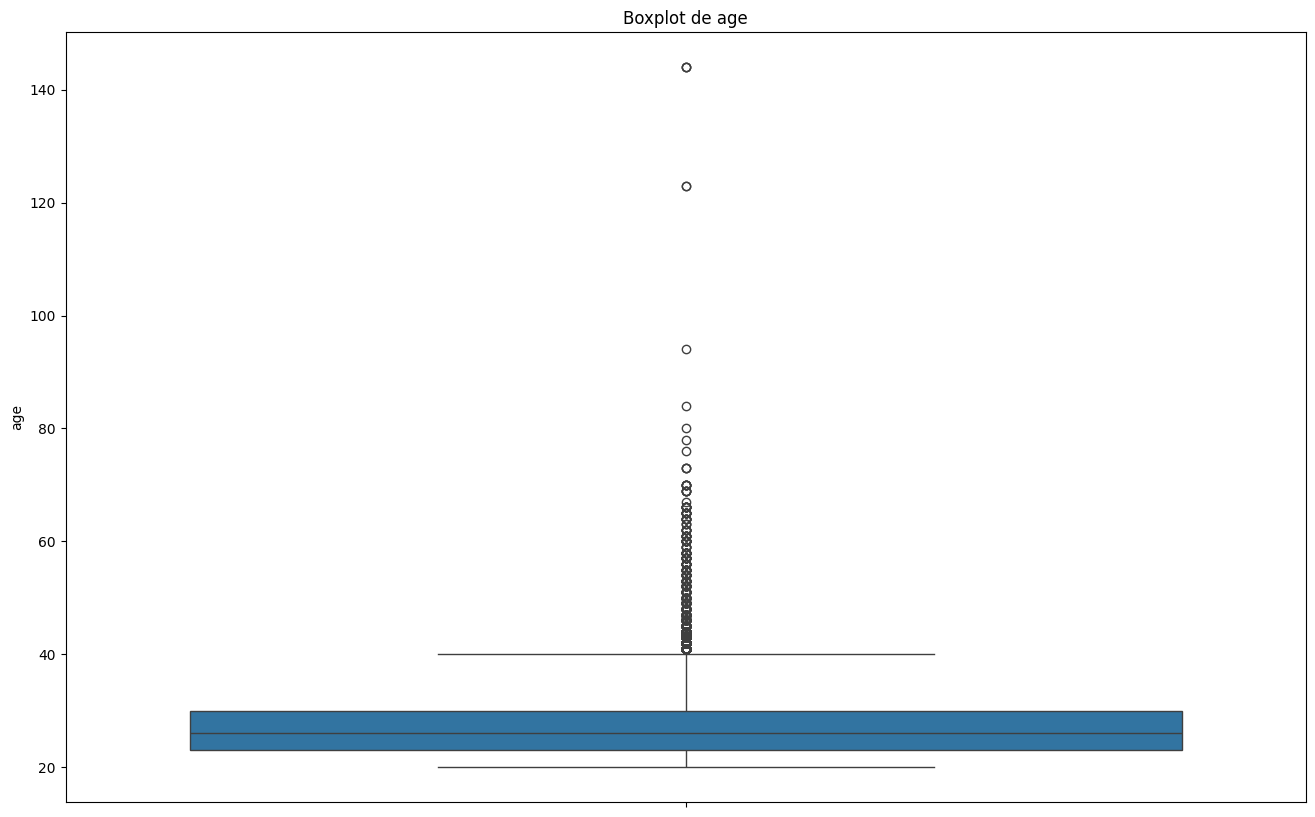

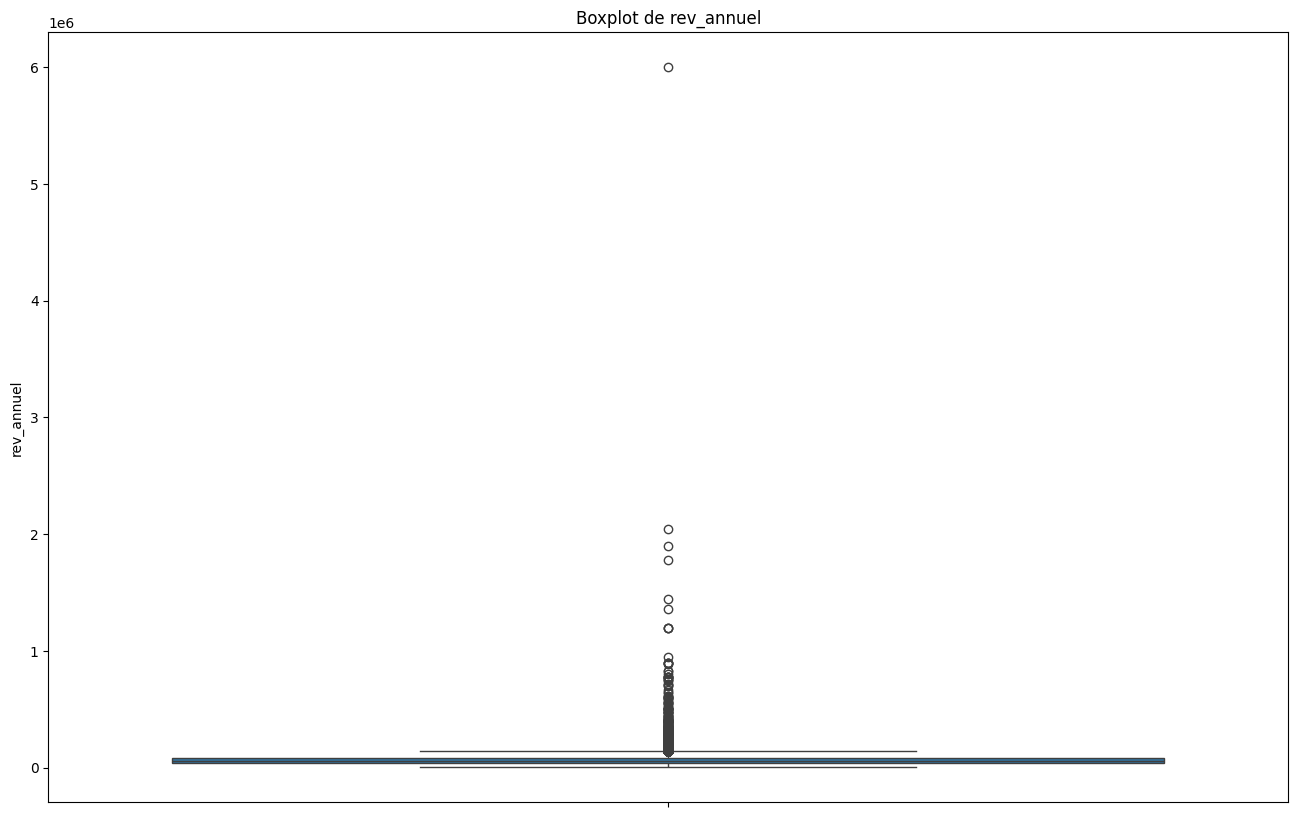

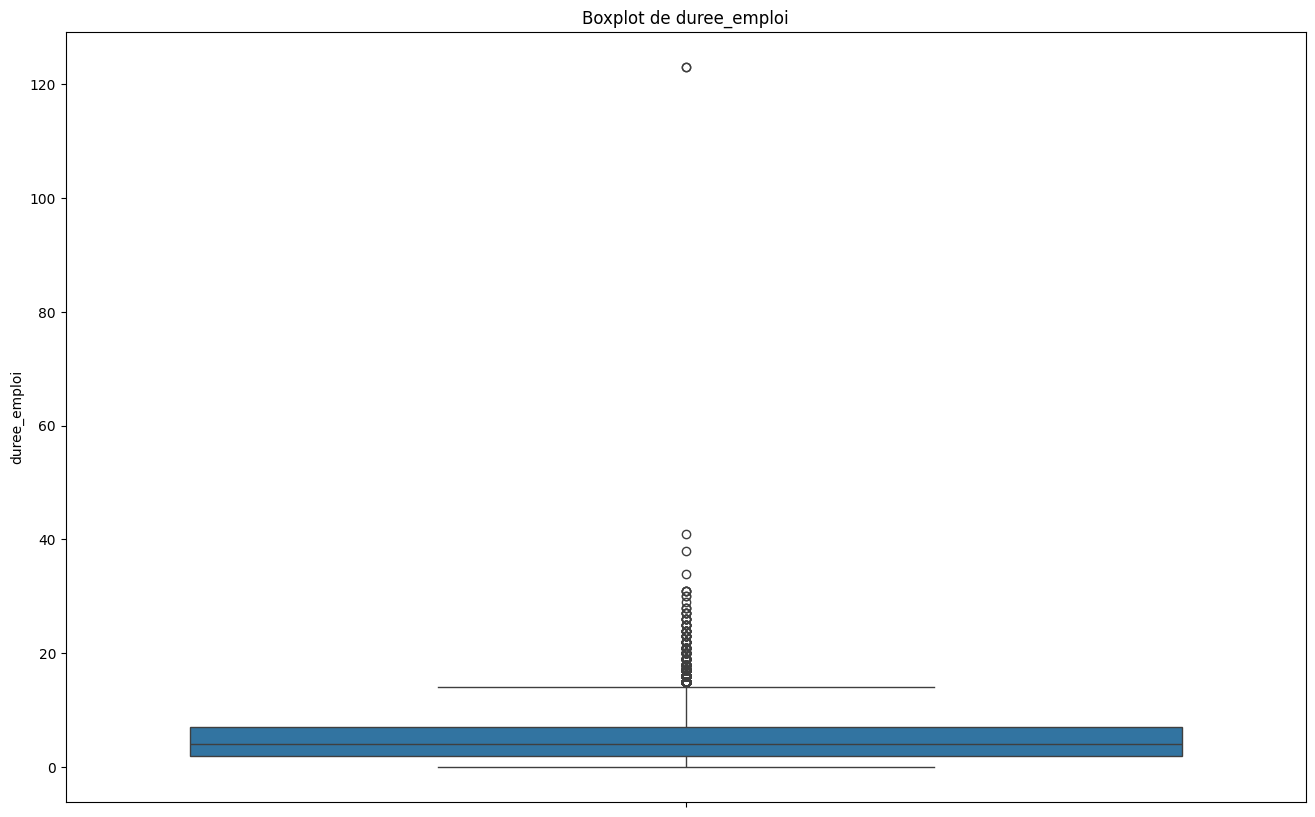

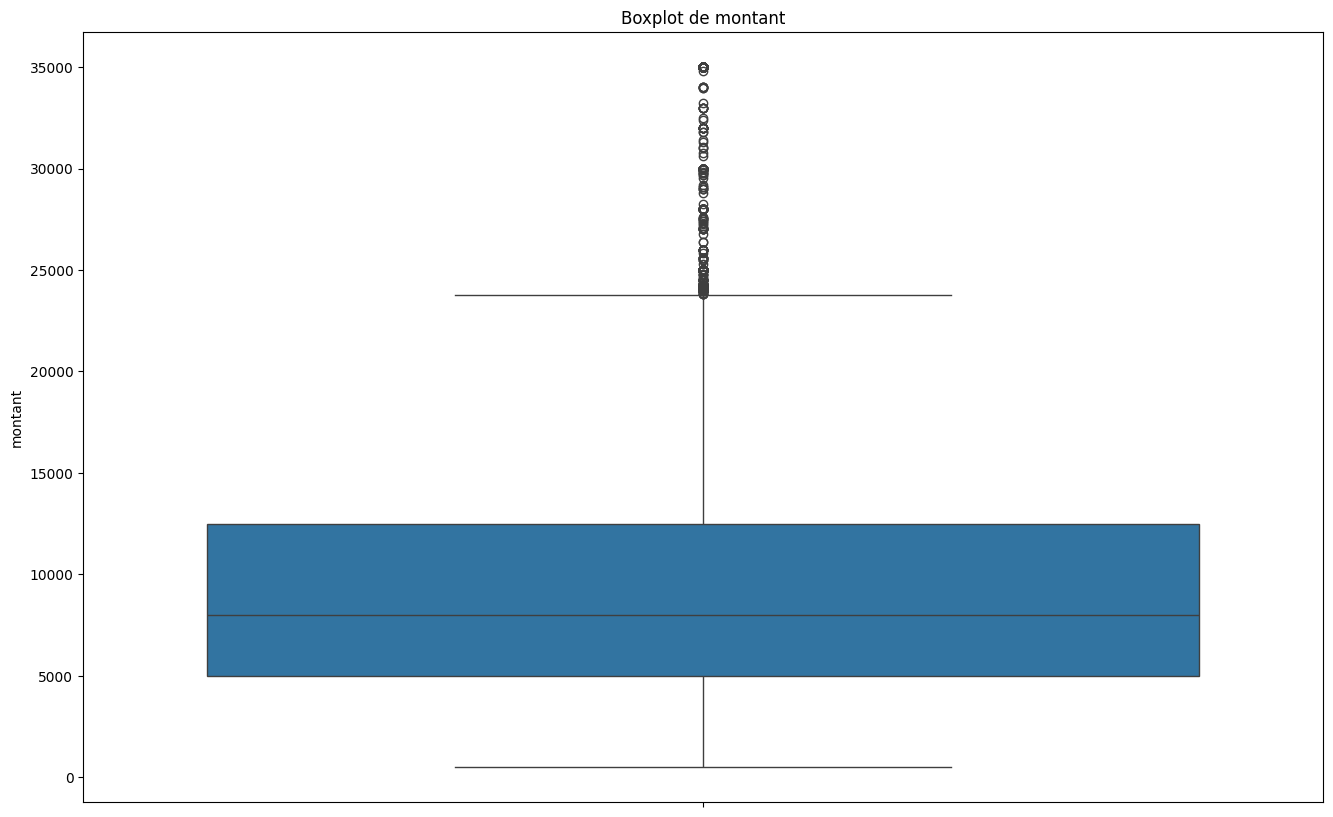

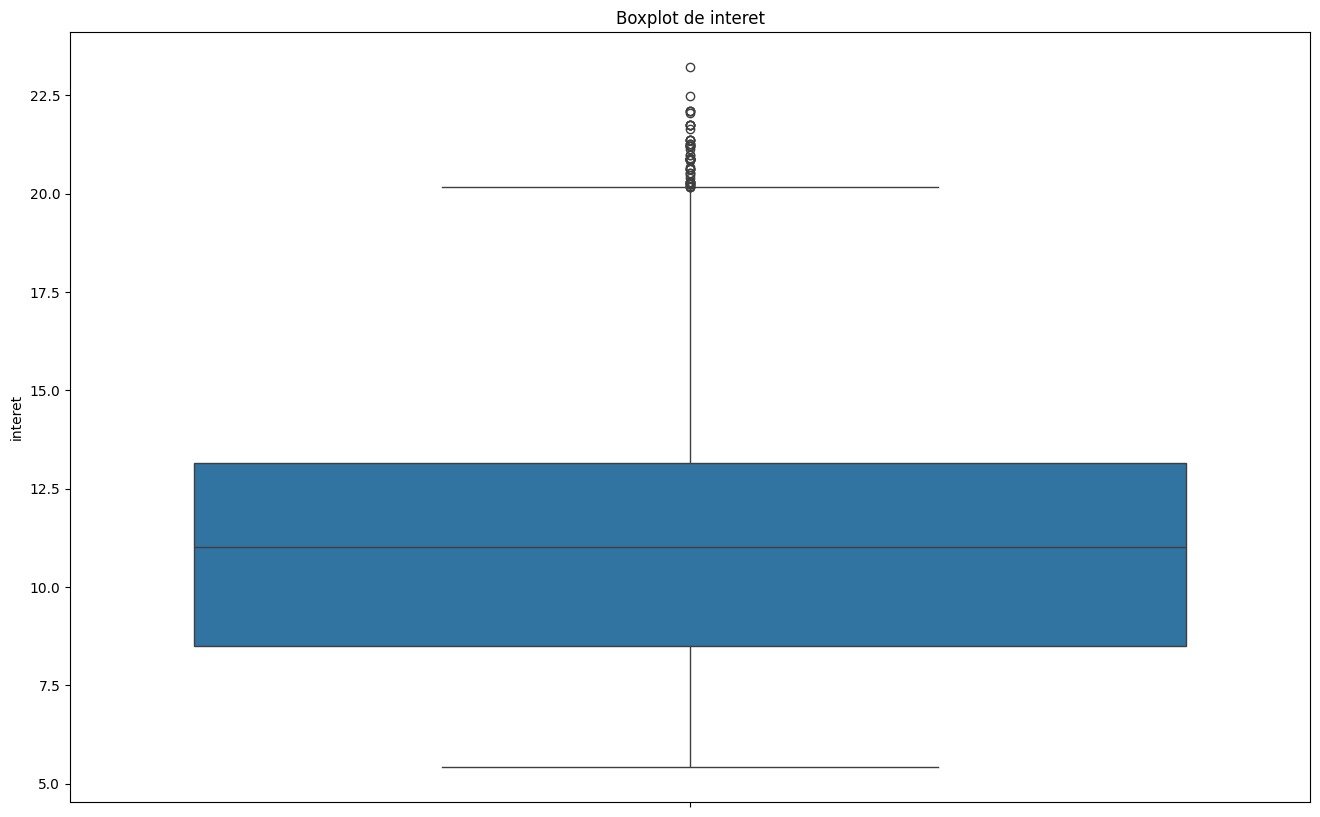

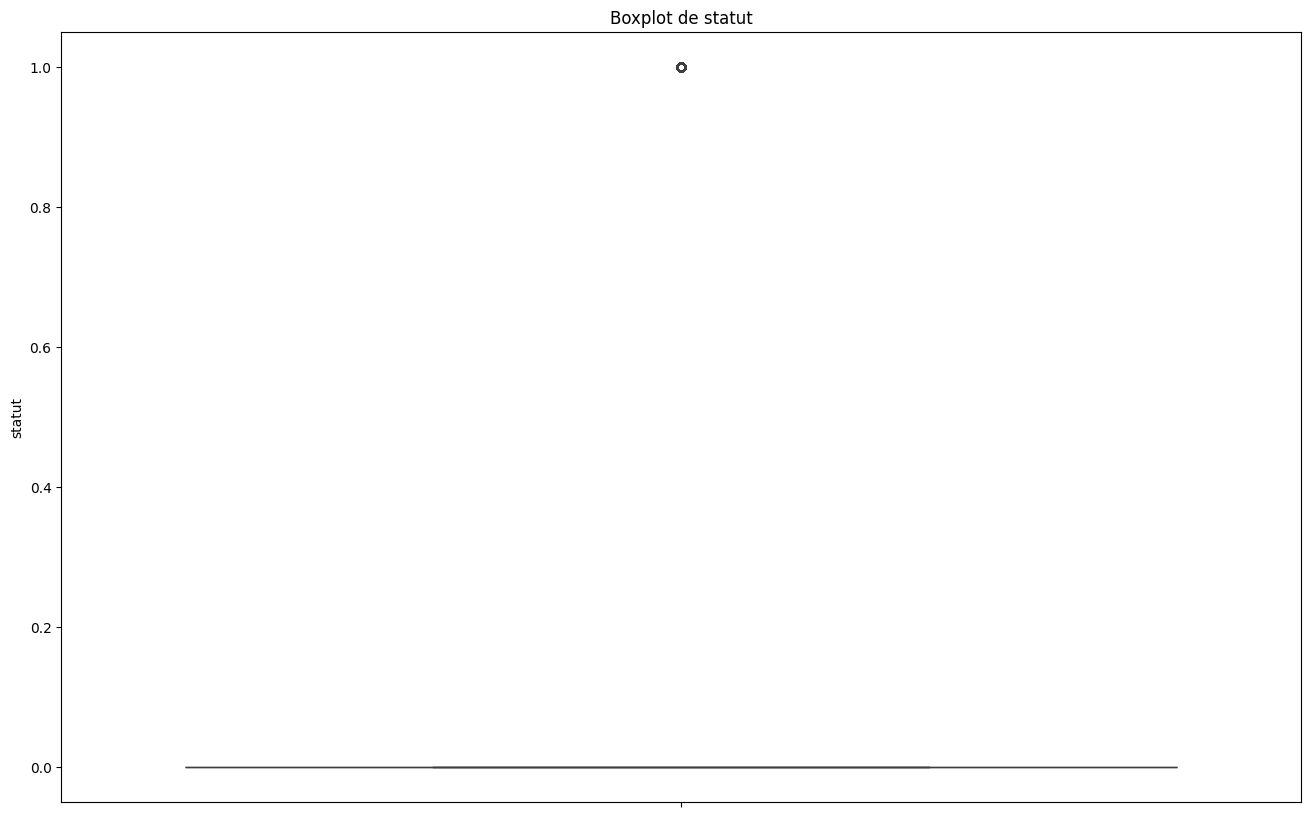

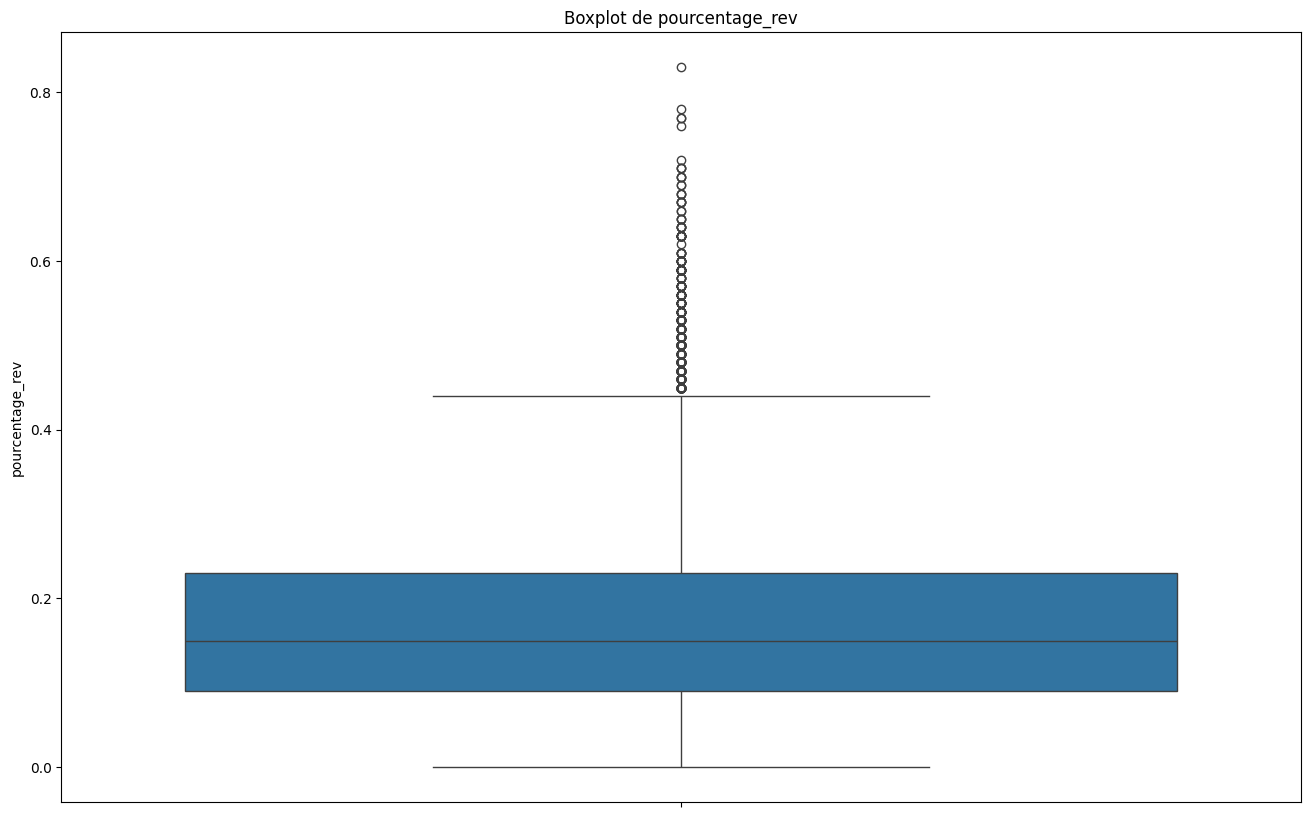

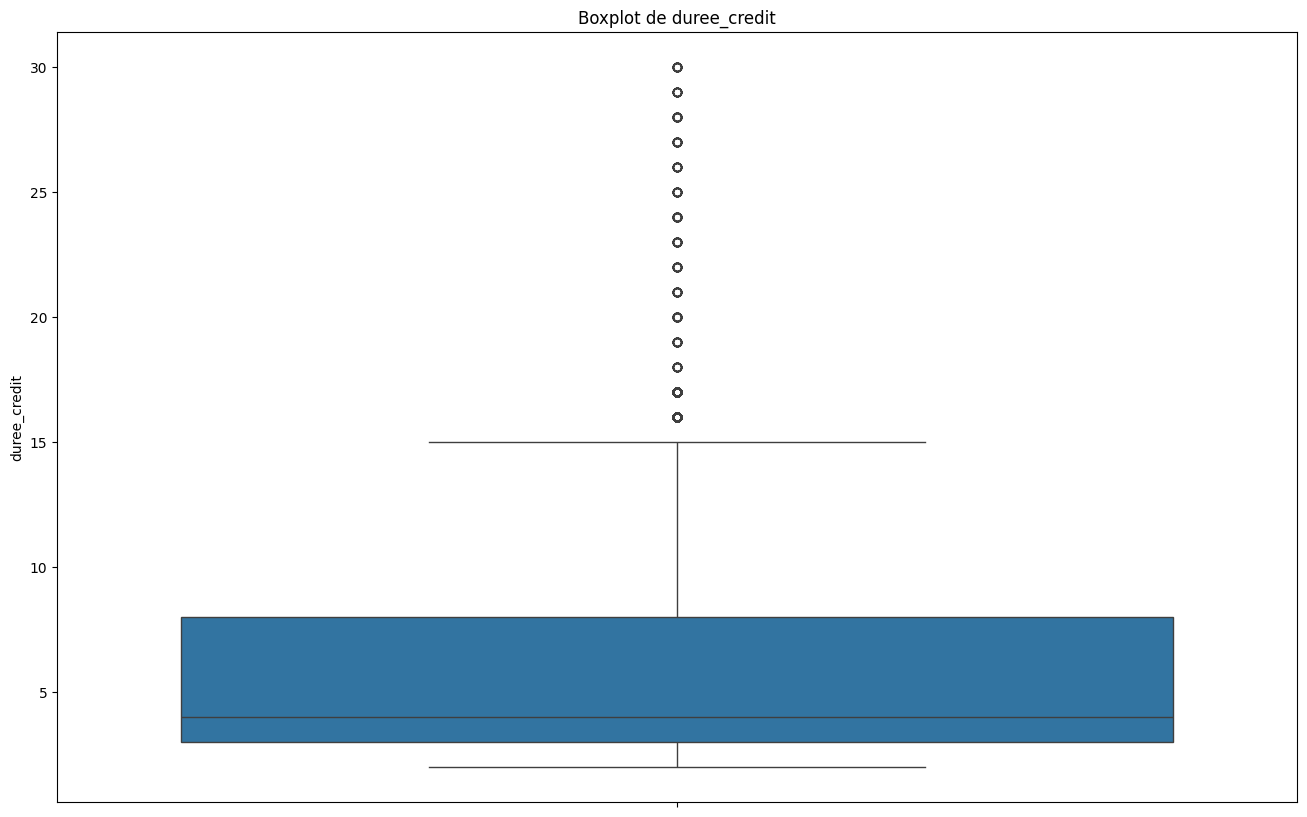

In [9]:
# Visualisation des outliers à l'aide des boxplots
col_num = card.select_dtypes(include=["float64","int64"]).columns.to_list()
for col in col_num:
    fig, ax = plt.subplots(figsize = (16,10))
    sns.boxplot(card[col])
    ax.set_title(f"Boxplot de {col}")
    plt.show()

In [10]:
# Fonction de gestion des outliers
def outlier_corrector(df):
    col_num = df.select_dtypes(include=["float64","int64"]).columns.to_list()
    for col in col_num:
        # Le calculs des valeurs max et min
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.5)
        iqr = q3 - q1
        vmax = q3 + 1.5*iqr
        vmin = q1 - 1.5*iqr
        moyenne = df[col].median()
        df.loc[:, col] = df[col].apply(lambda x: moyenne if (x < vmin) or (x > vmax) else x)
    return df
# Getsion des outliers
for i in ["age","duree_emploi","montant","rev_annuel", "interet", "pourcentage_rev","duree_credit"]:
    card.loc[:,i] = outlier_corrector(card[[i]])

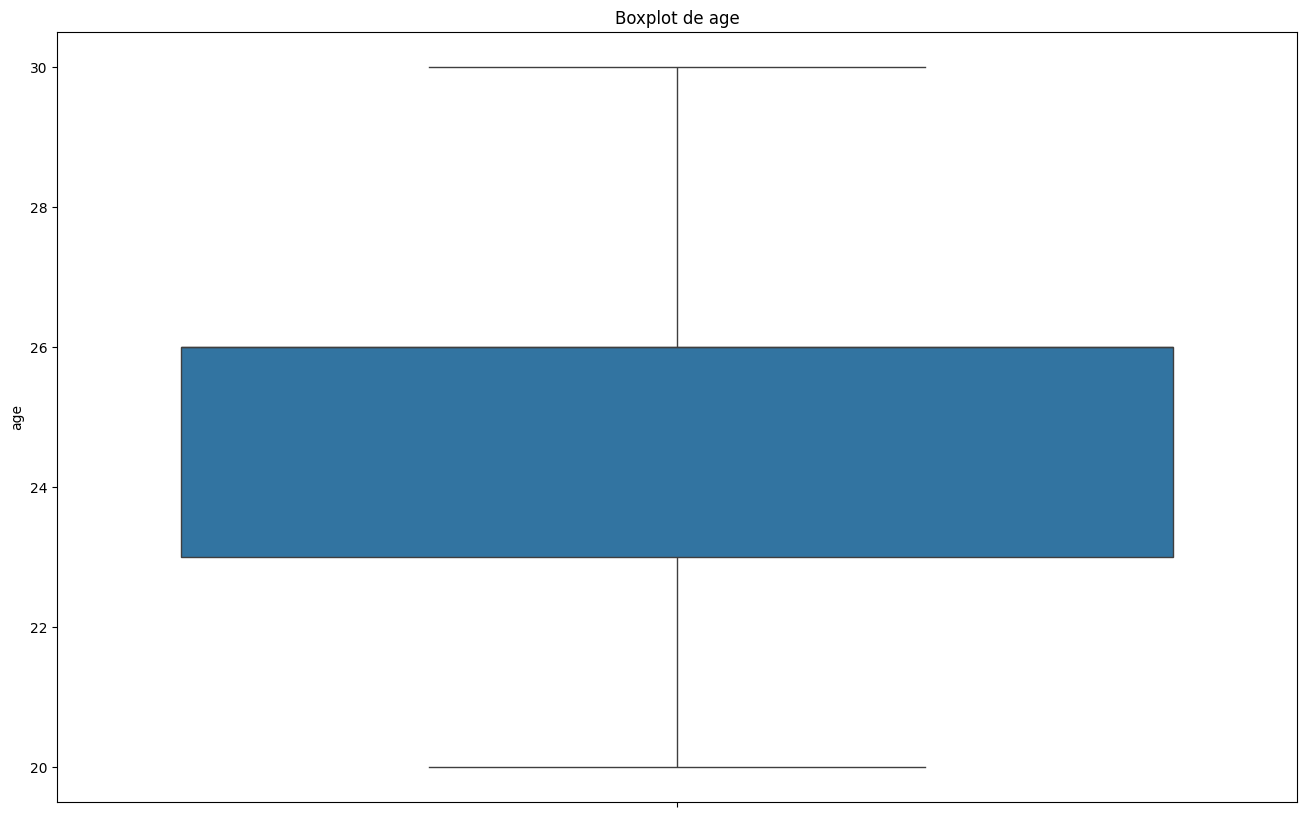

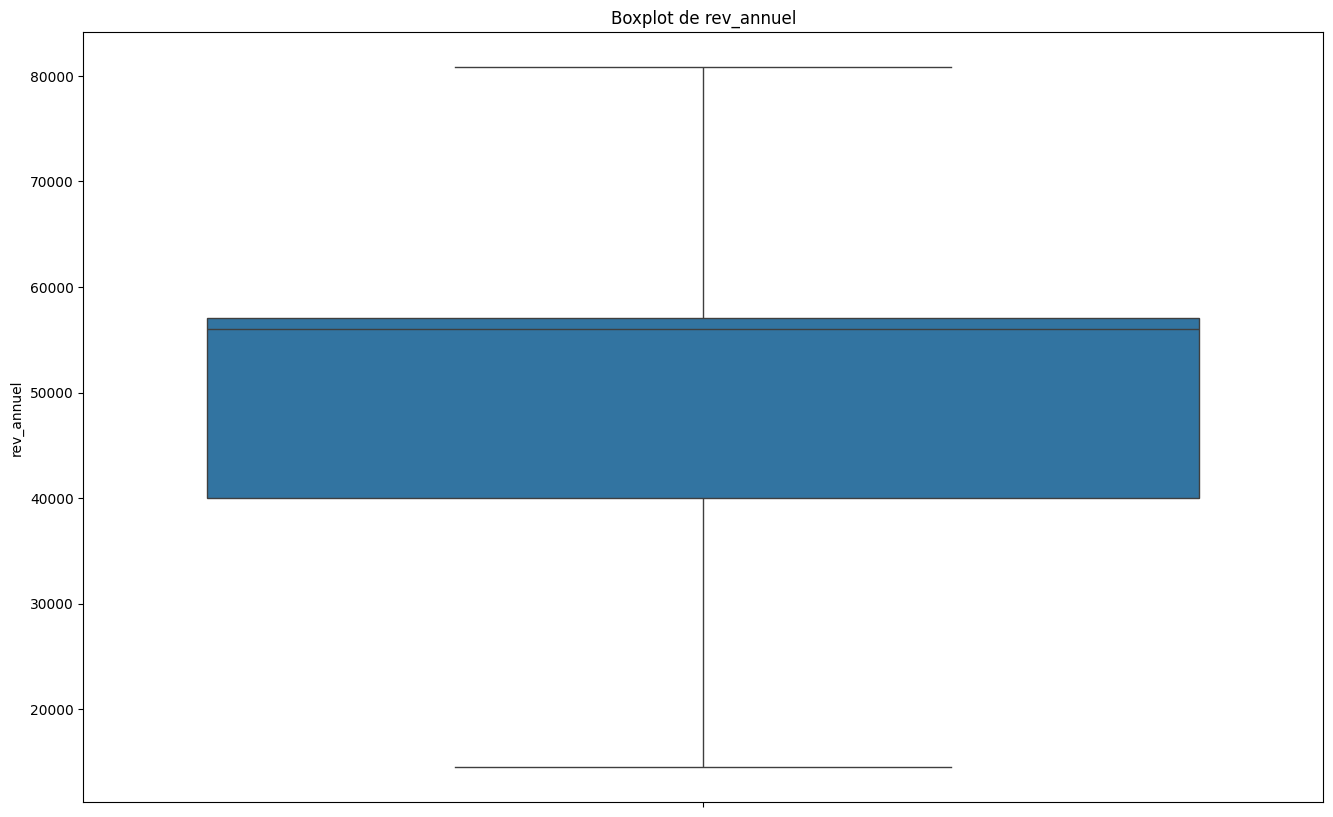

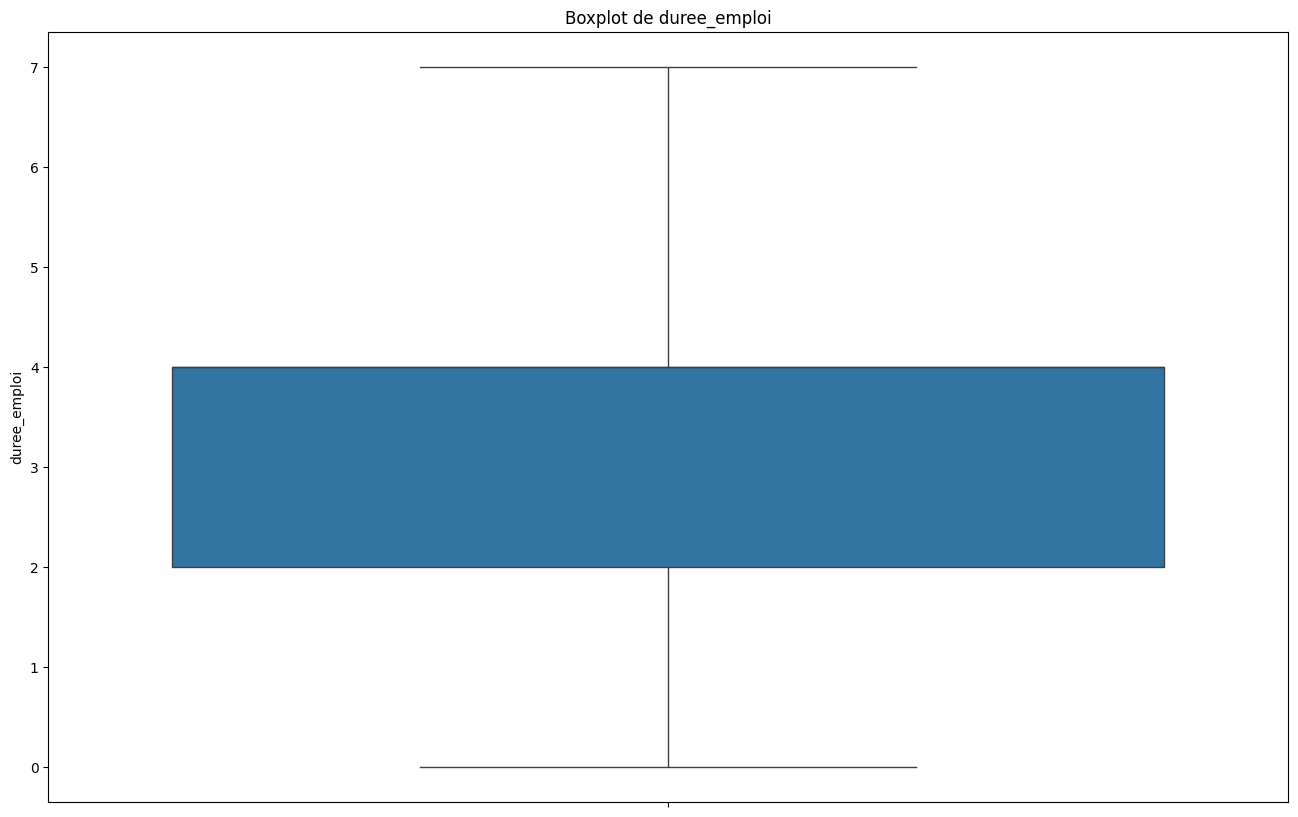

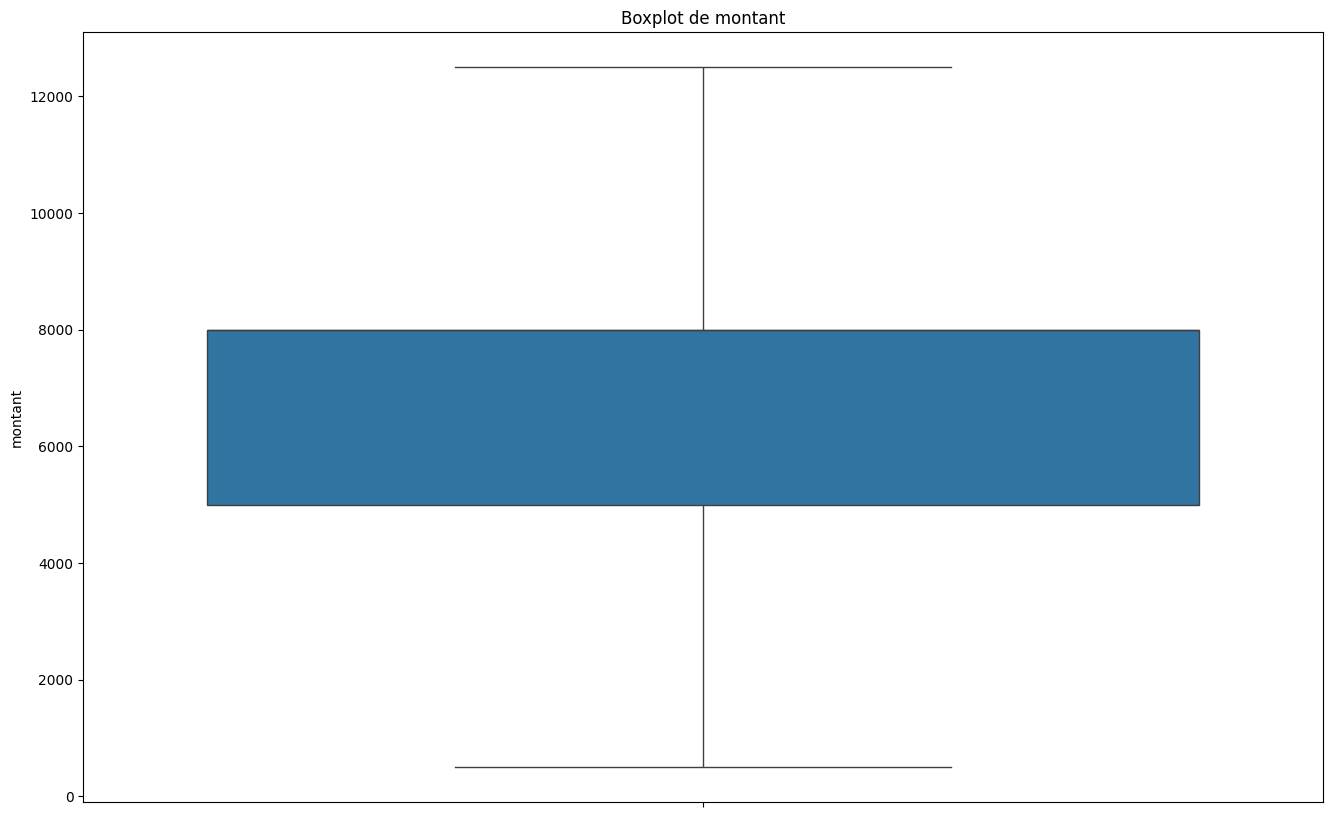

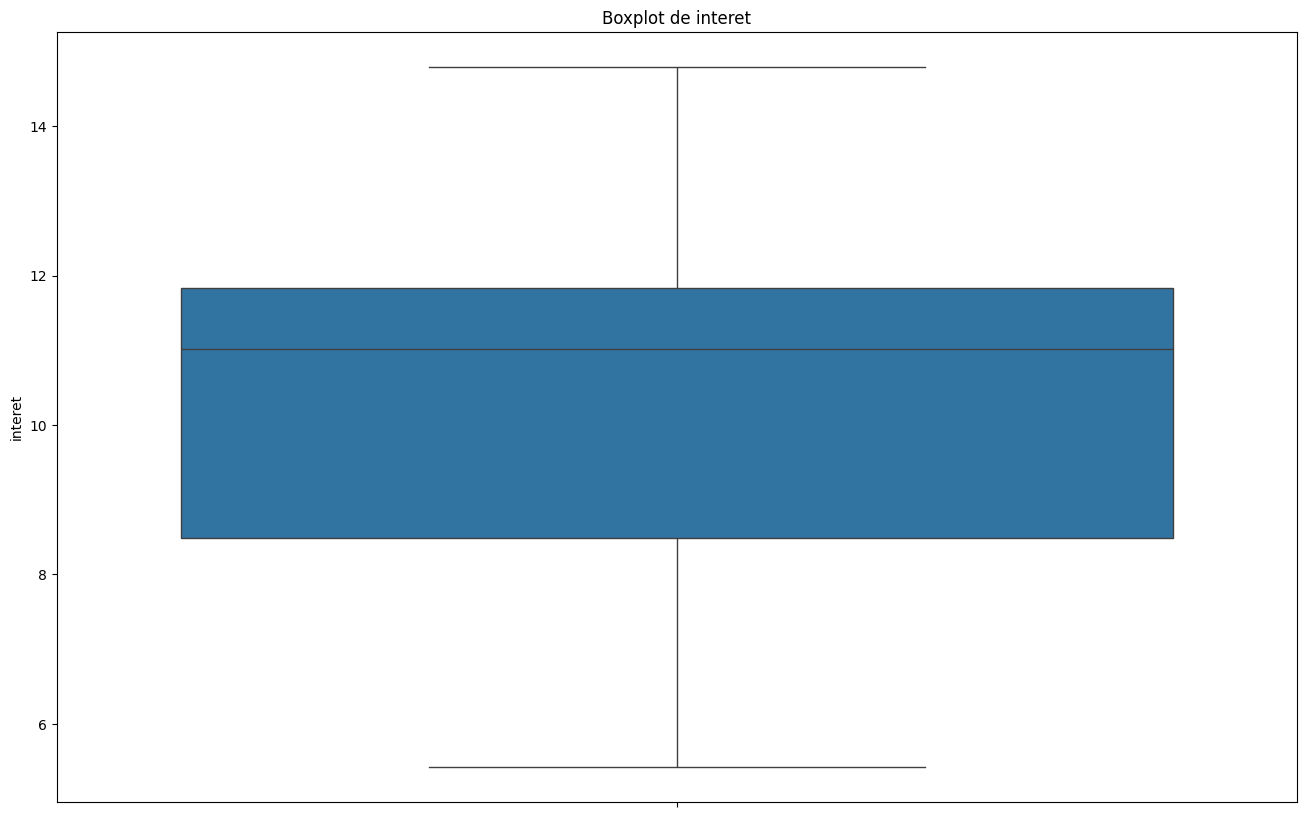

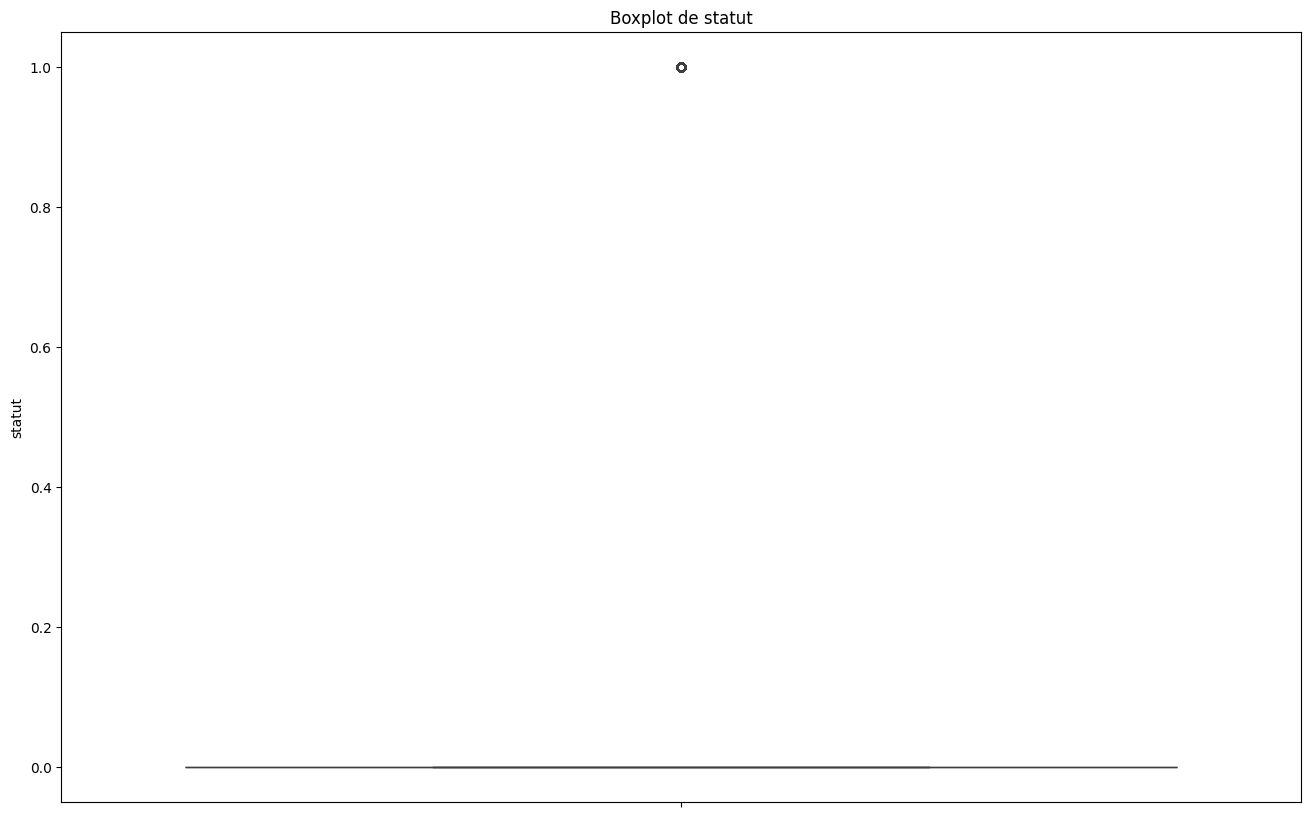

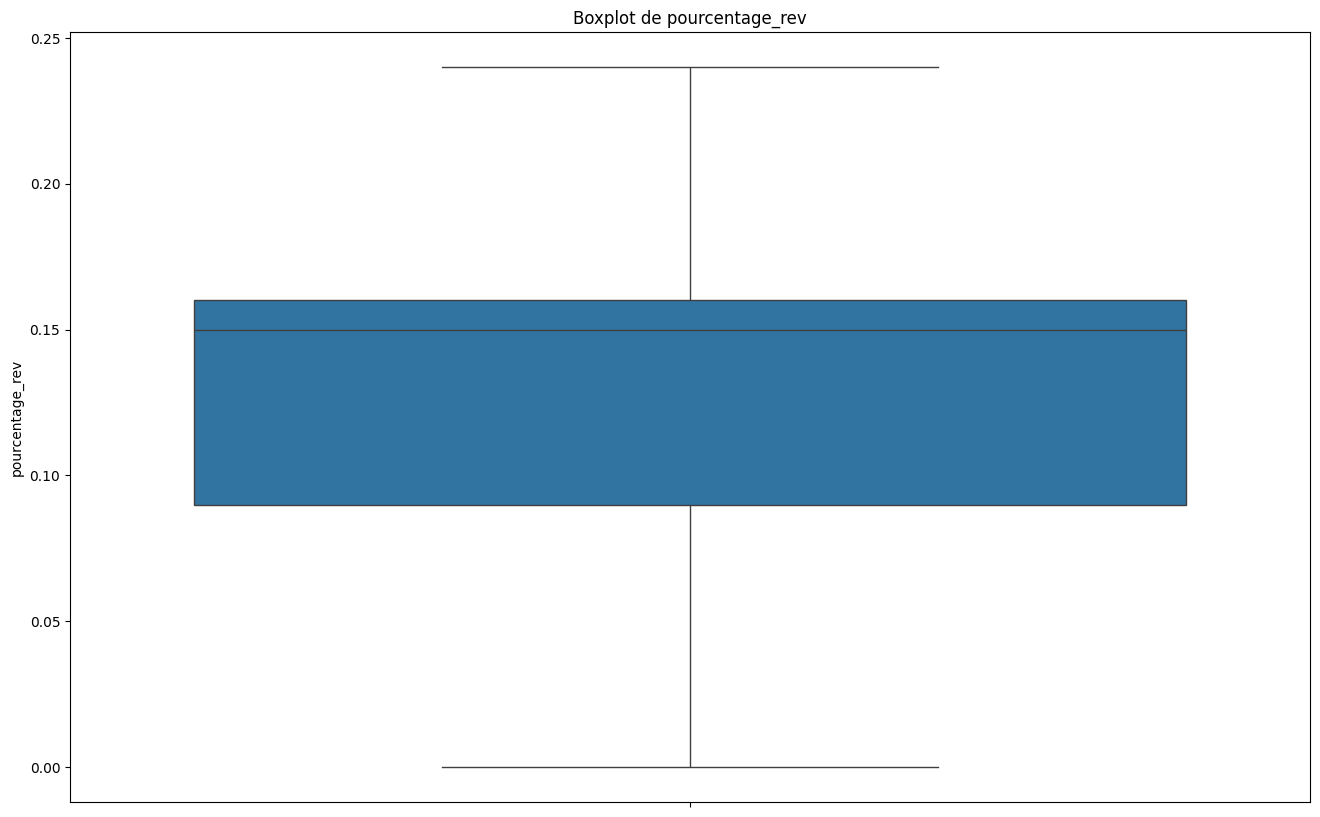

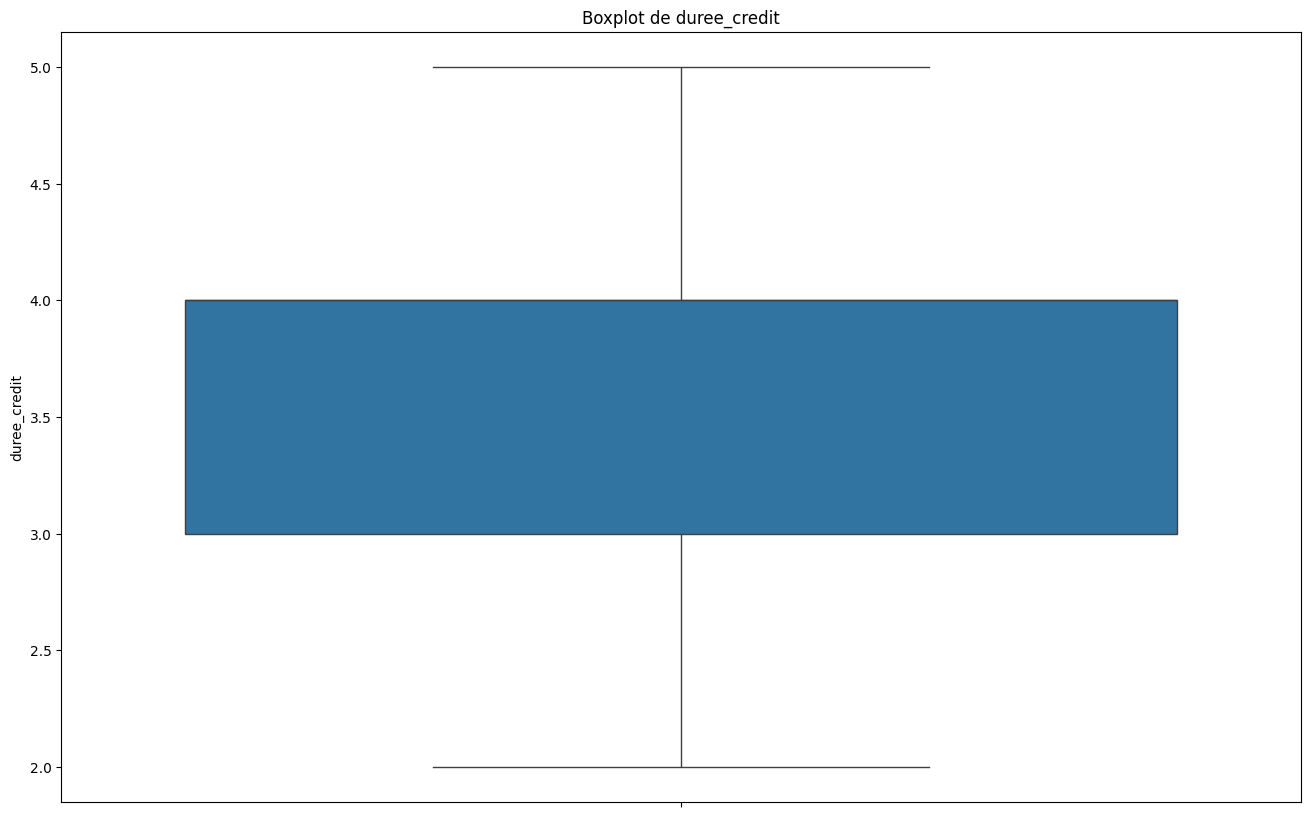

In [11]:

# Visualisation après gestion des  outliers
for col in col_num:
    fig, ax = plt.subplots(figsize = (16,10))
    sns.boxplot(card[col])
    ax.set_title(f"Boxplot de {col}")
    plt.show()

age n'est pas normalement distribuée, p_value : 0.0 et stat : 881.276


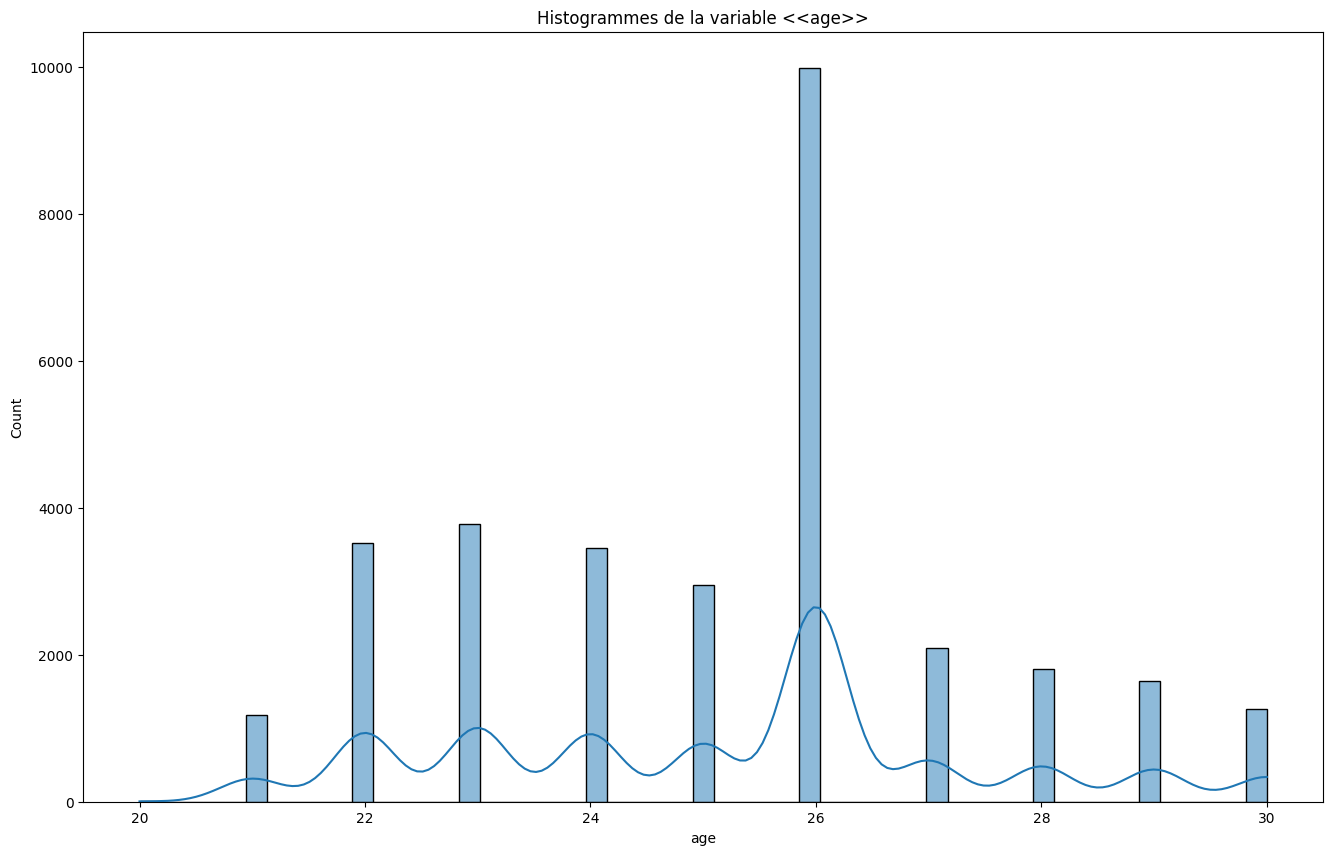

rev_annuel n'est pas normalement distribuée, p_value : 0.0 et stat : 794.656


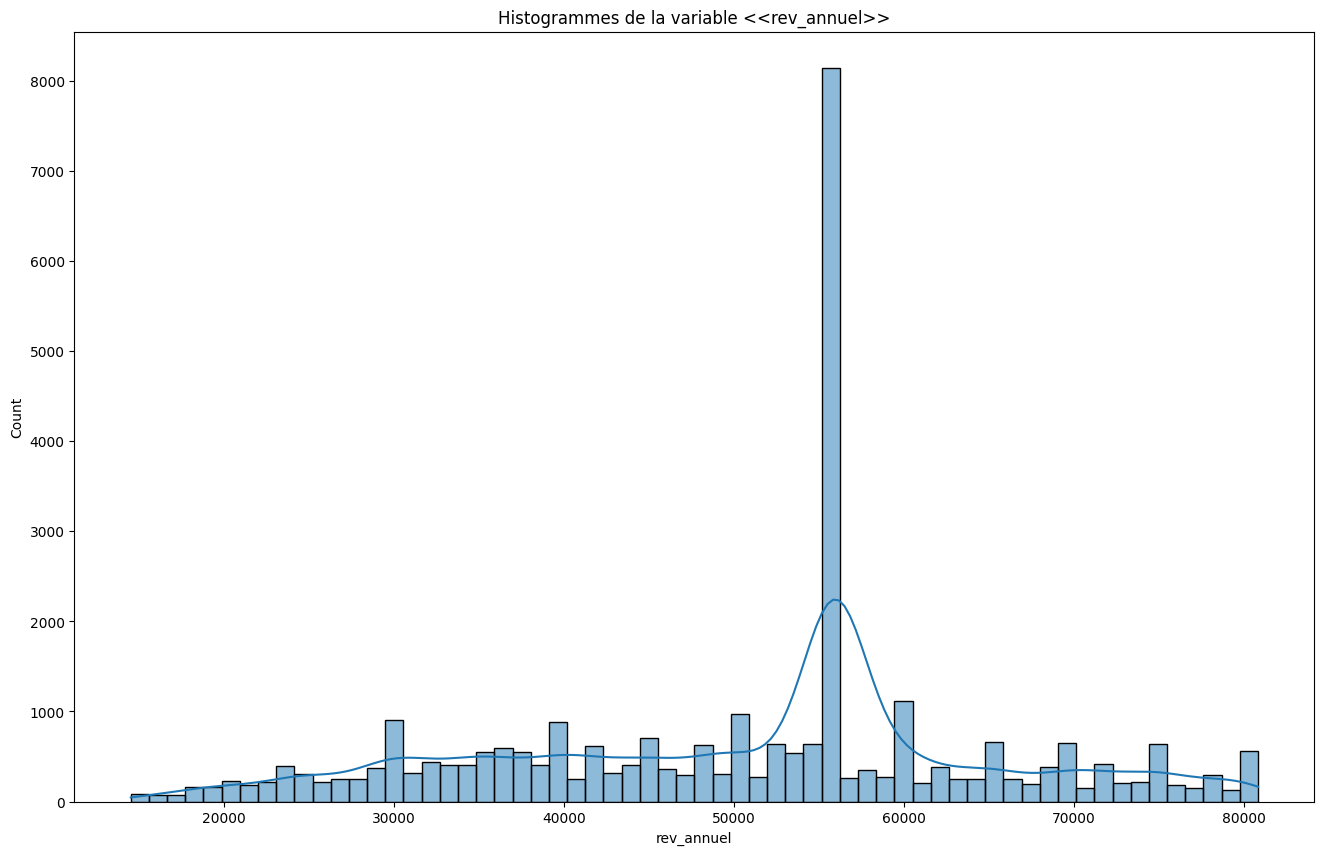

duree_emploi n'est pas normalement distribuée, p_value : 0.0 et stat : 2856.725


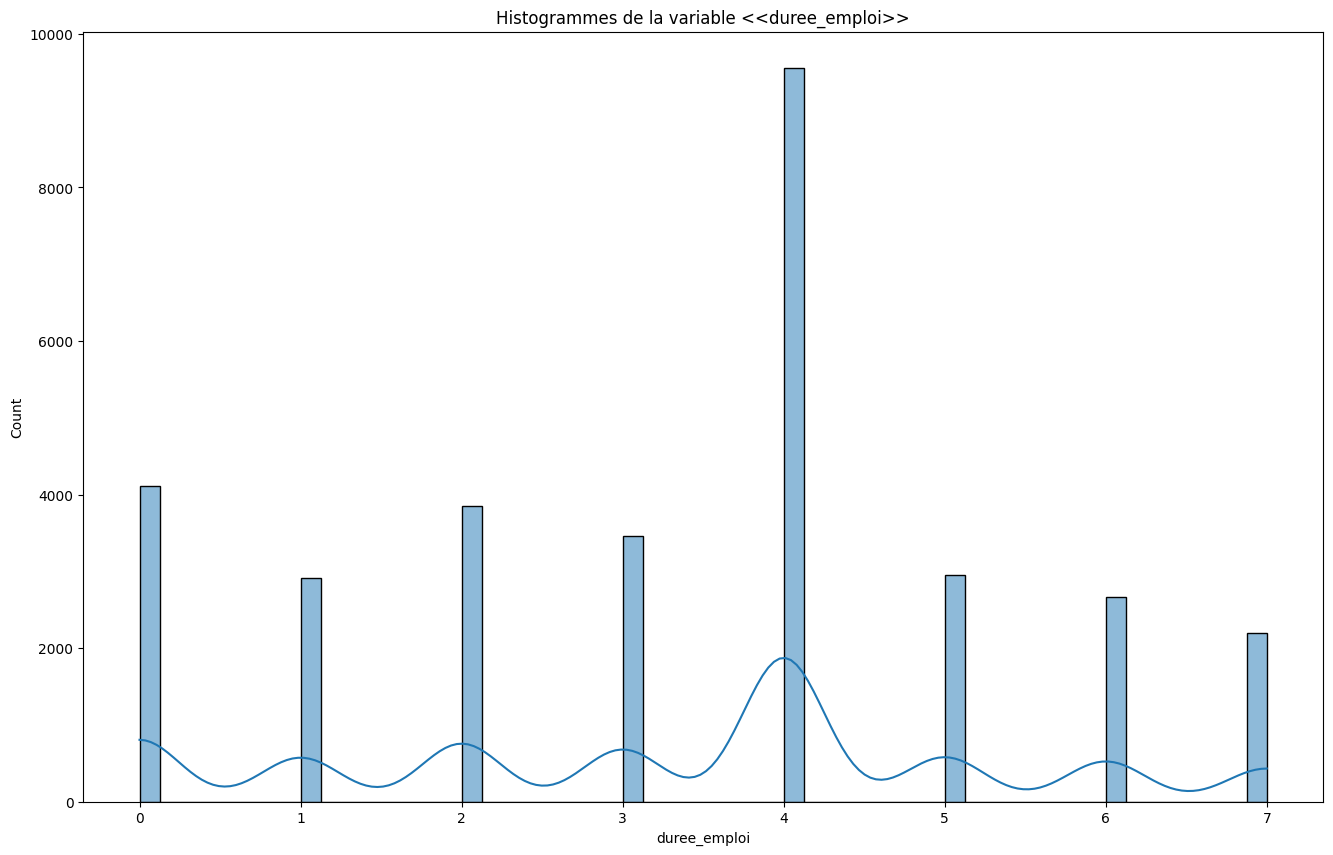

montant n'est pas normalement distribuée, p_value : 0.0 et stat : 1098.07


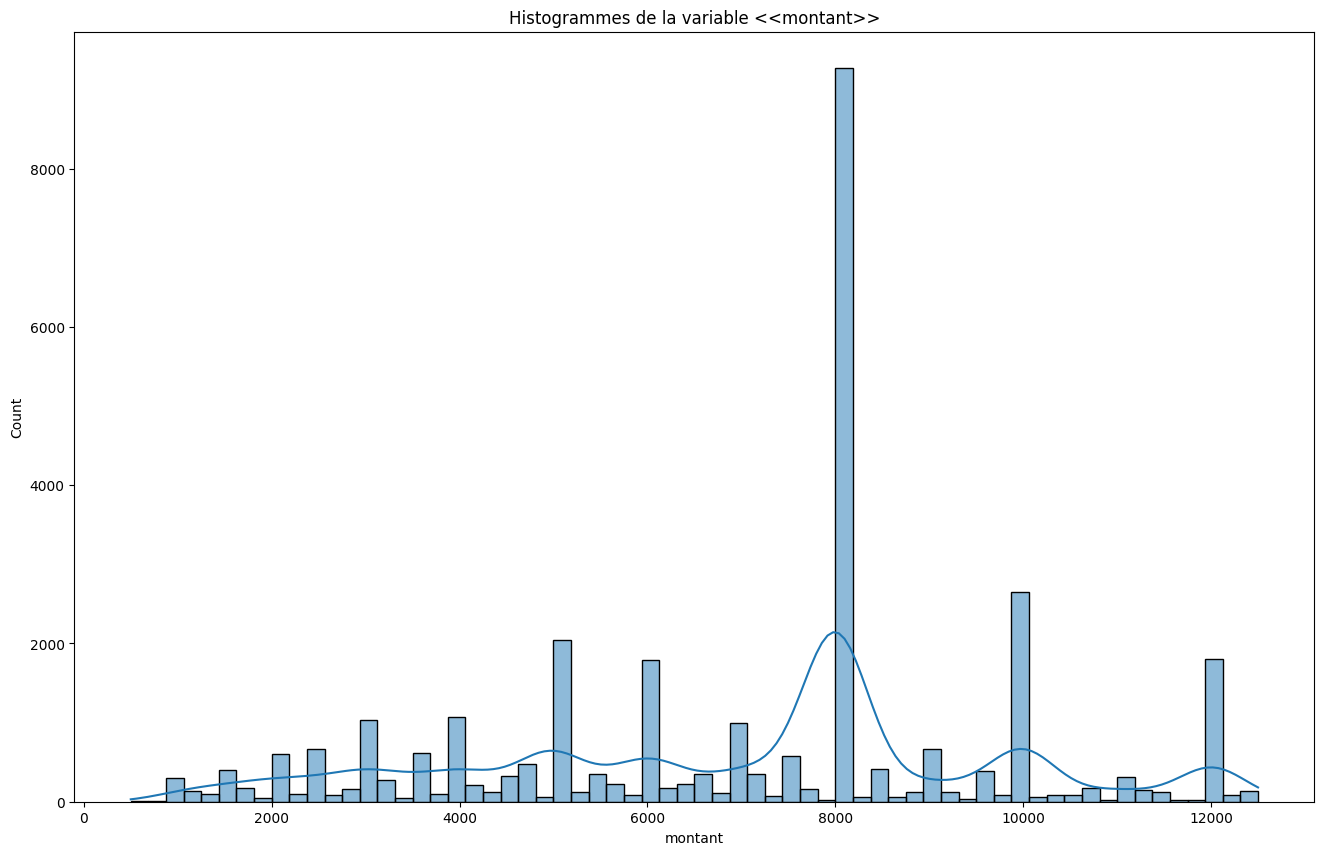

interet n'est pas normalement distribuée, p_value : 0.0 et stat : 2068.522


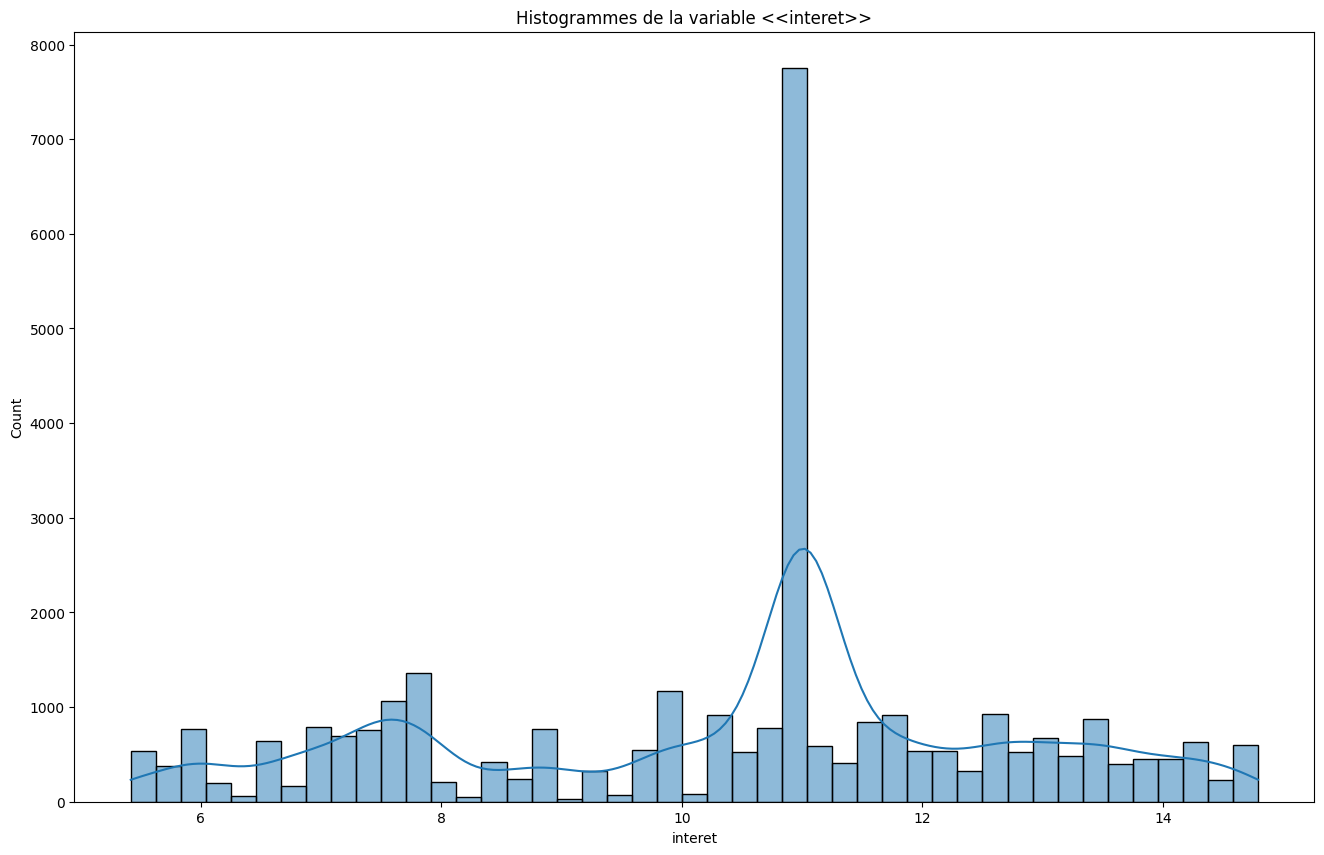

statut n'est pas normalement distribuée, p_value : 0.0 et stat : 5950.778


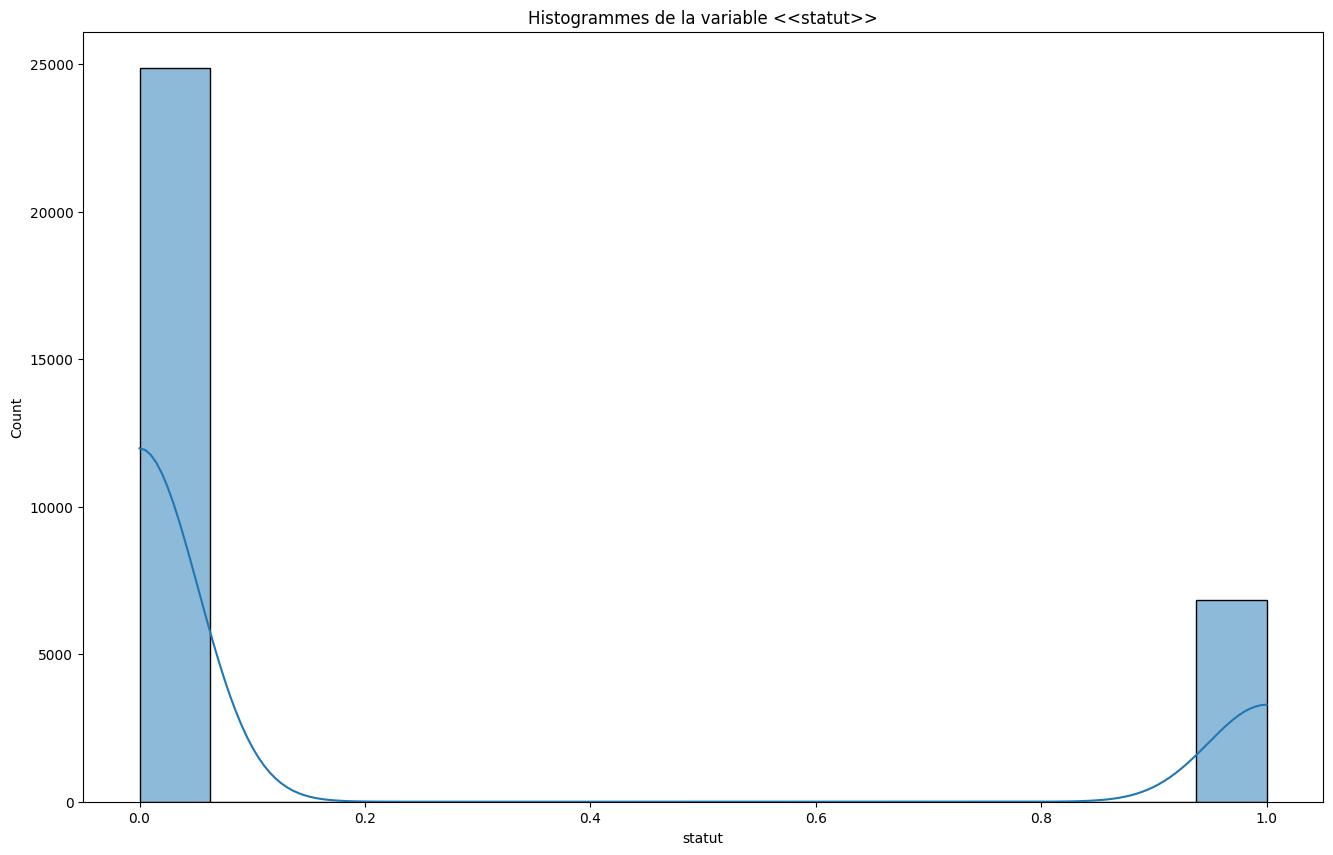

pourcentage_rev n'est pas normalement distribuée, p_value : 0.0 et stat : 1127.372


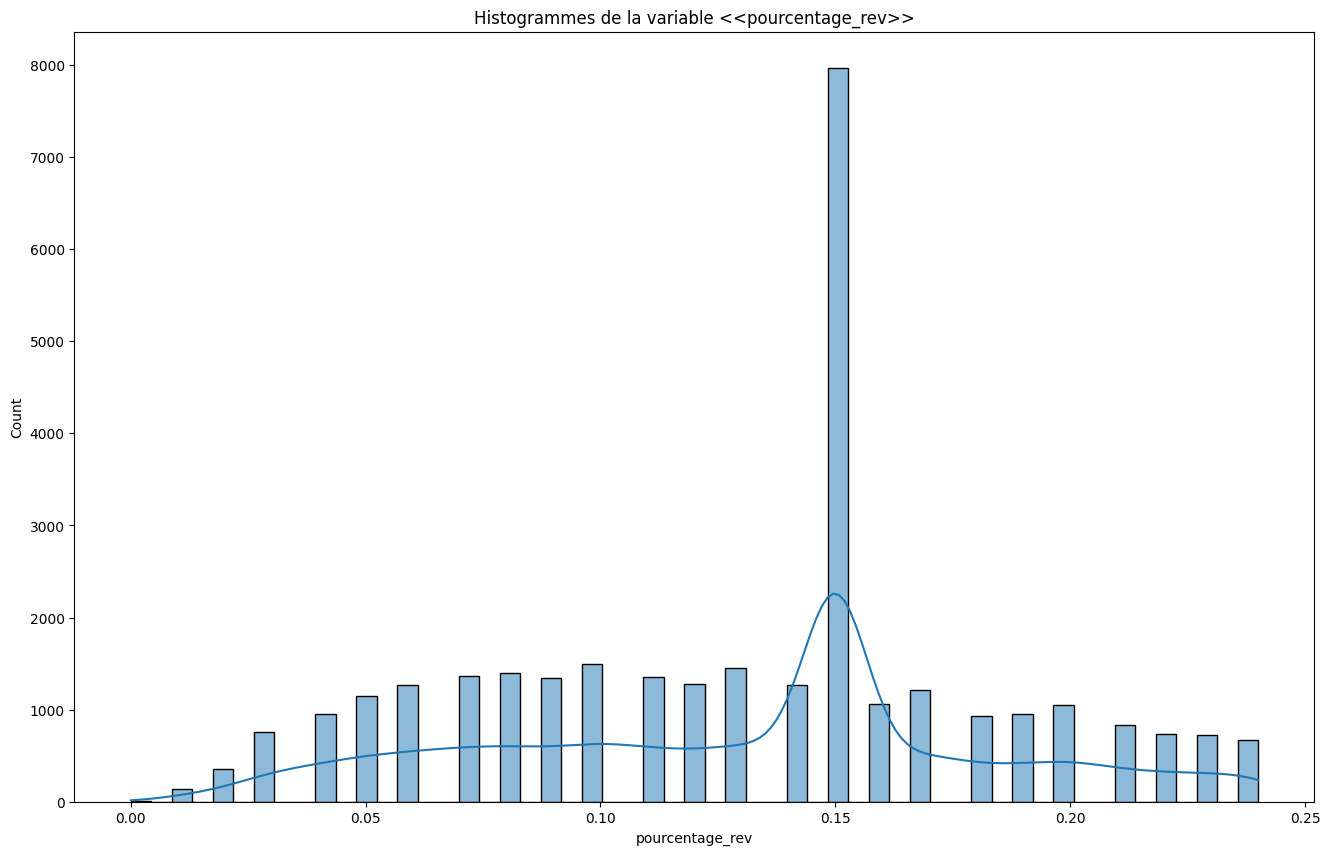

duree_credit n'est pas normalement distribuée, p_value : 0.0 et stat : 2820.007


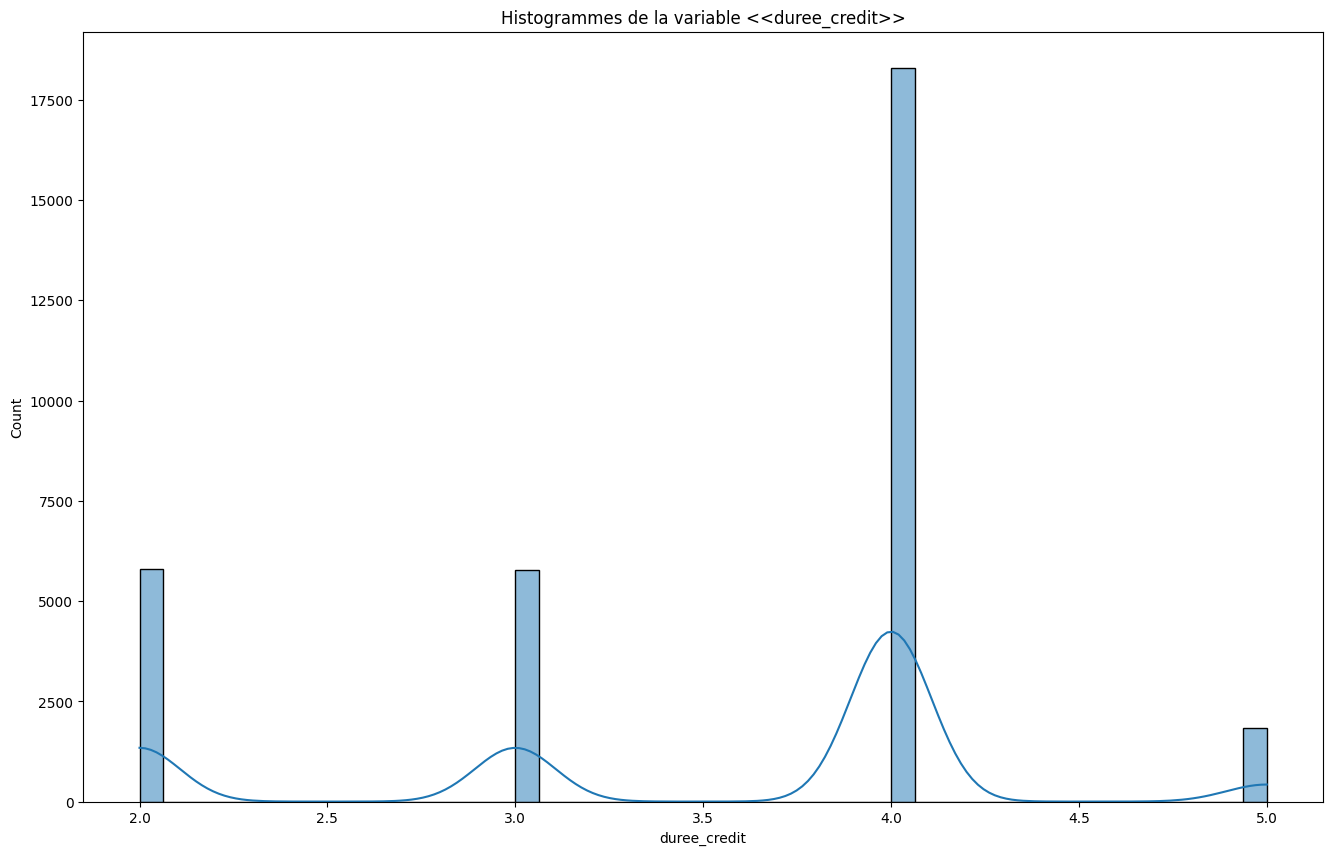

In [12]:
# Fonction de Test de normalité

def normal_test(df):
    col_num = df.select_dtypes(include=["float64","int64"]).columns.to_list()
    for col in col_num:
        fig ,ax = plt.subplots(figsize = (16,10))
        statistic, pvalue = stat.normaltest(card[col])
        ax.set_title(f"Histogrammes de la variable <<{col}>>")
        sns.histplot(data = df, x=col, kde=True)
        if pvalue < 0.05:
            print(f"{col} n'est pas normalement distribuée, p_value : {round(pvalue,3)} et stat : {round(statistic,3)}")
        else:
            print(f" {col} est normalement distribuée")
        plt.show()

# Execution de la fonction
normal_test(card) 

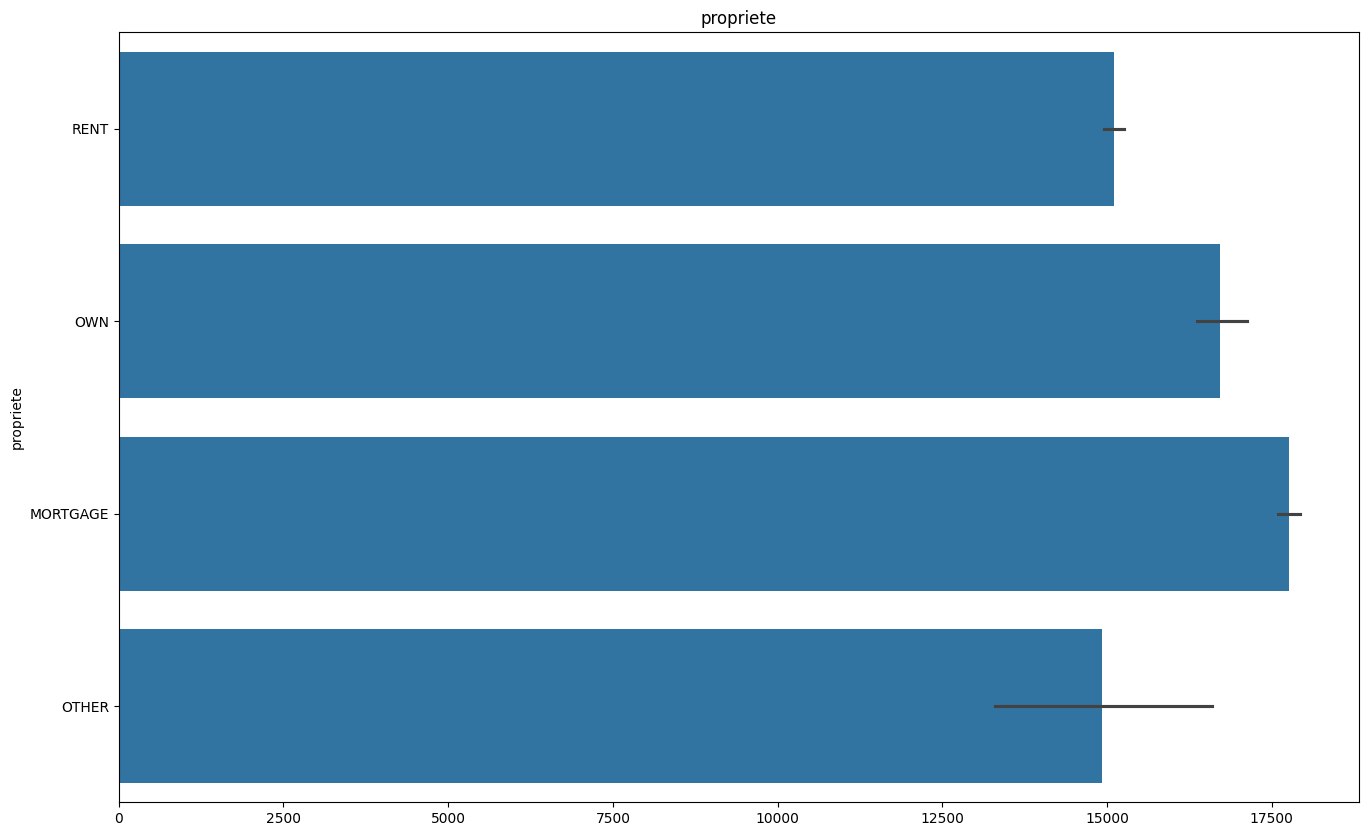

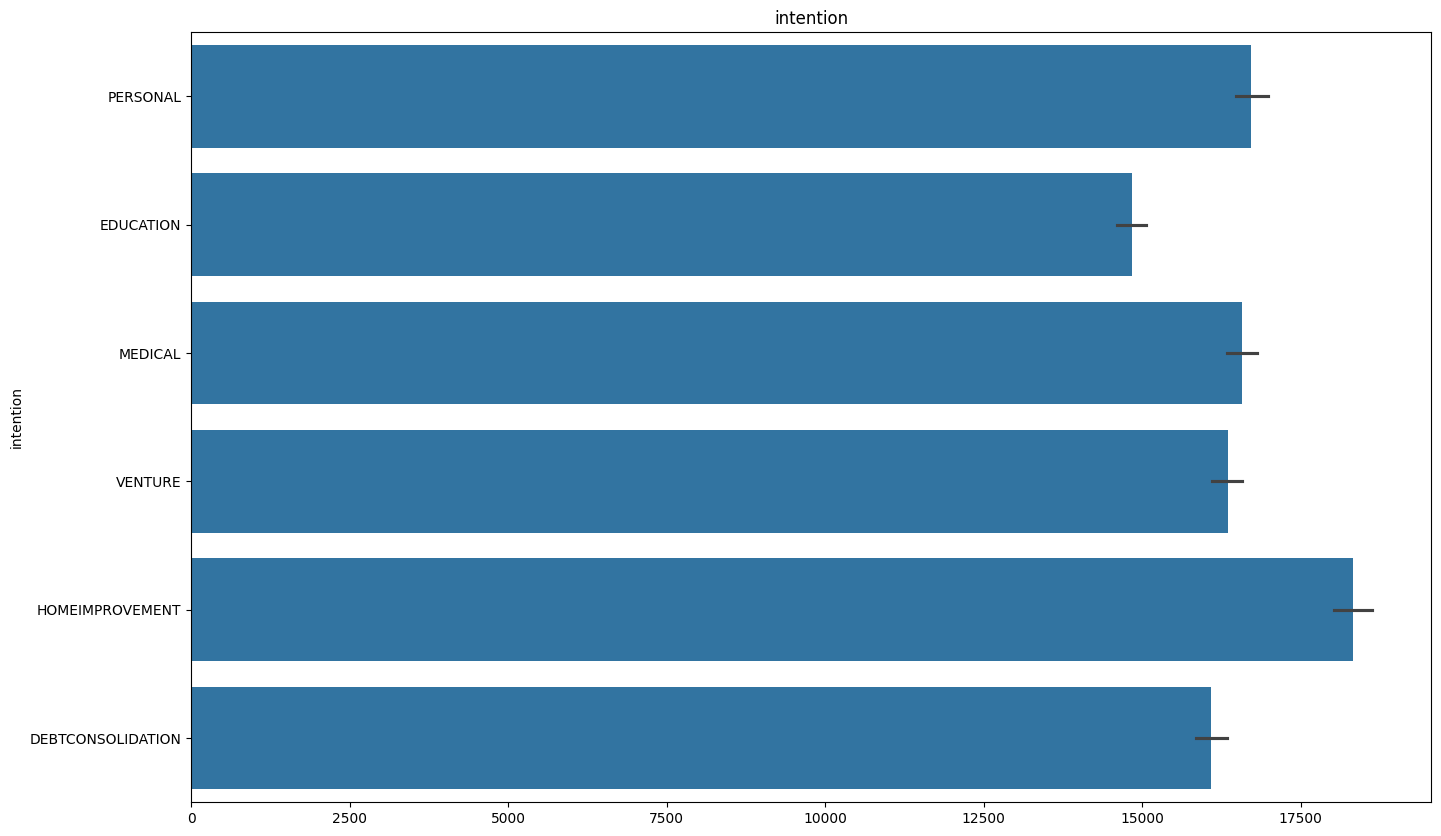

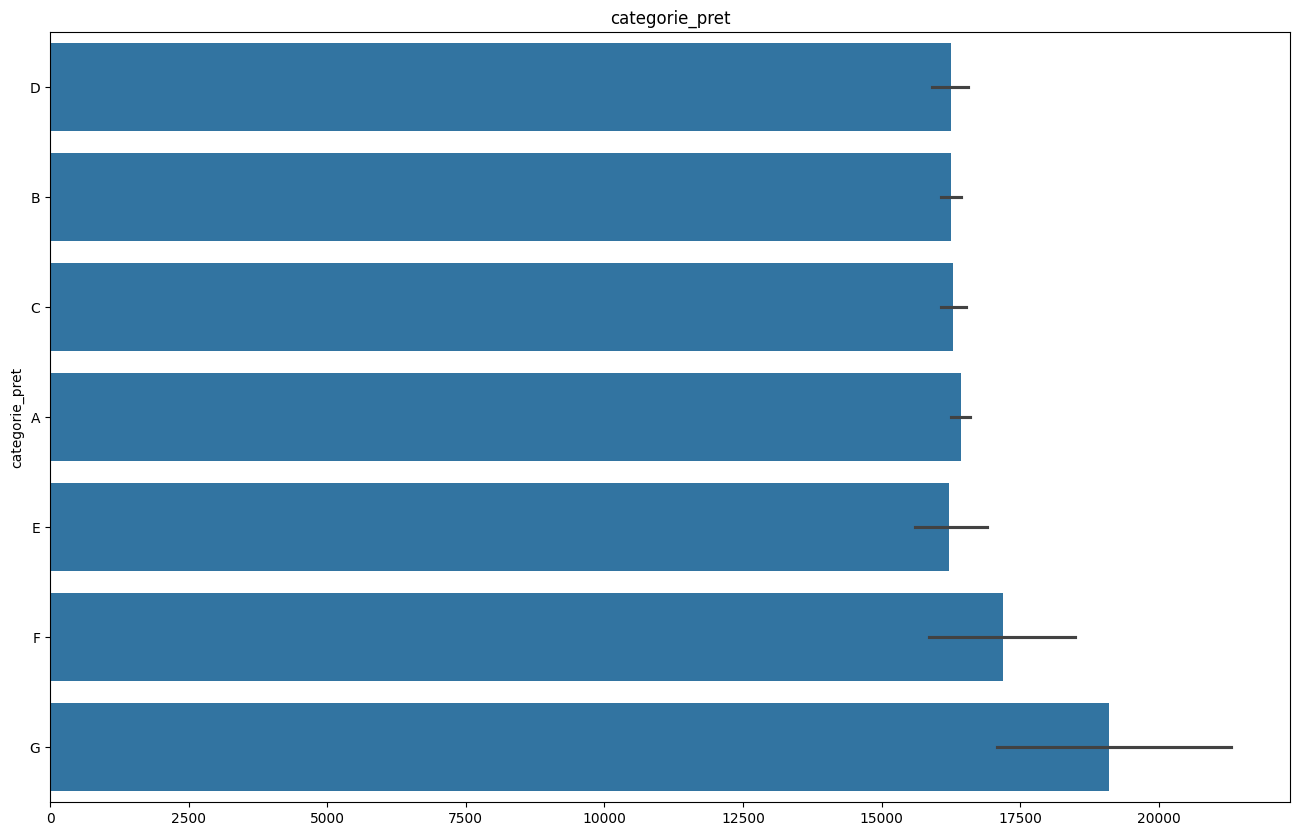

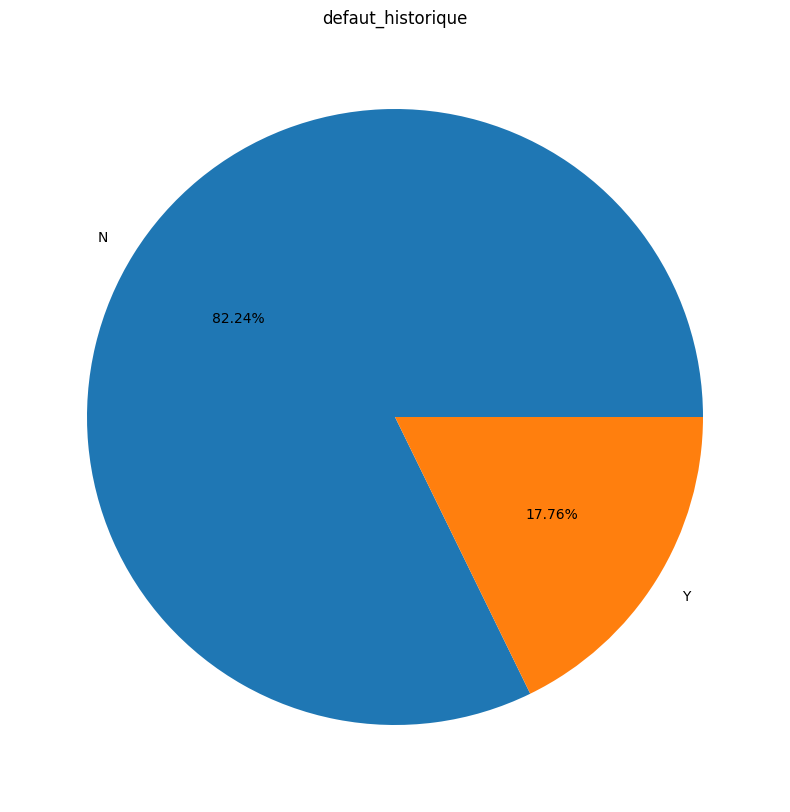

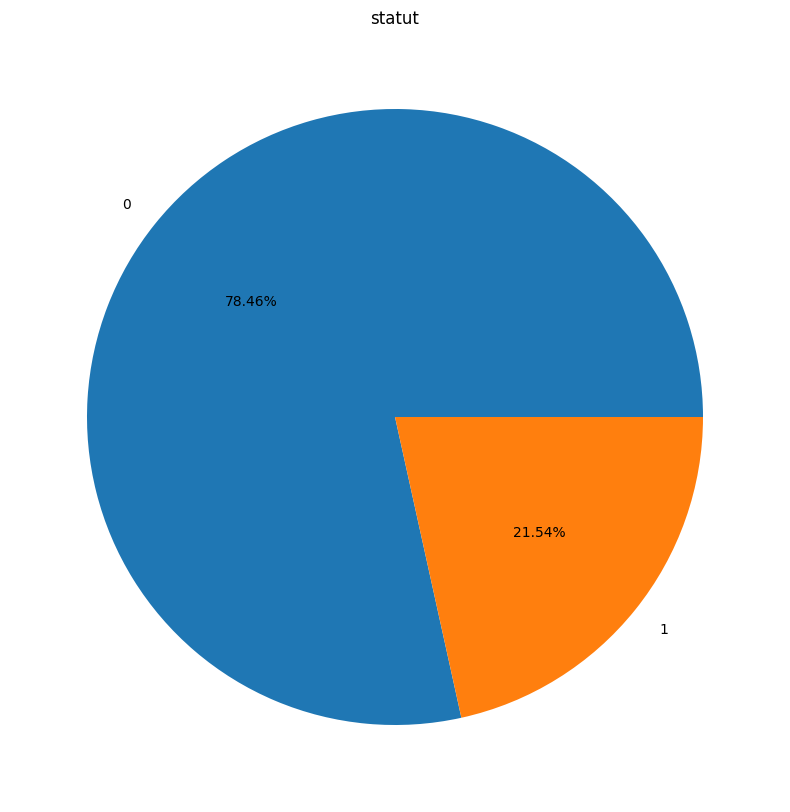

In [13]:
# Analyse qualitative
def var_quality(df):
    col_object = df.select_dtypes(include=["object"]).columns.to_list()
    col_object.append('statut')
    for j in col_object :
        tab = (card[j].value_counts())/len(card)
        fig, ax = plt.subplots(figsize = (16,10))
        if len(tab.index)<=3:
            plt.pie(tab, autopct="%.2f%%", labels=tab.index)
            ax.set_title(f"{j}")
            plt.show()
        else:
            sns.barplot(data = card[j])
            ax.set_title(f'{j}')
            plt.show()

# Execution de la fonction
var_quality(card)

## **2. ANALYSE BIVARIEE**

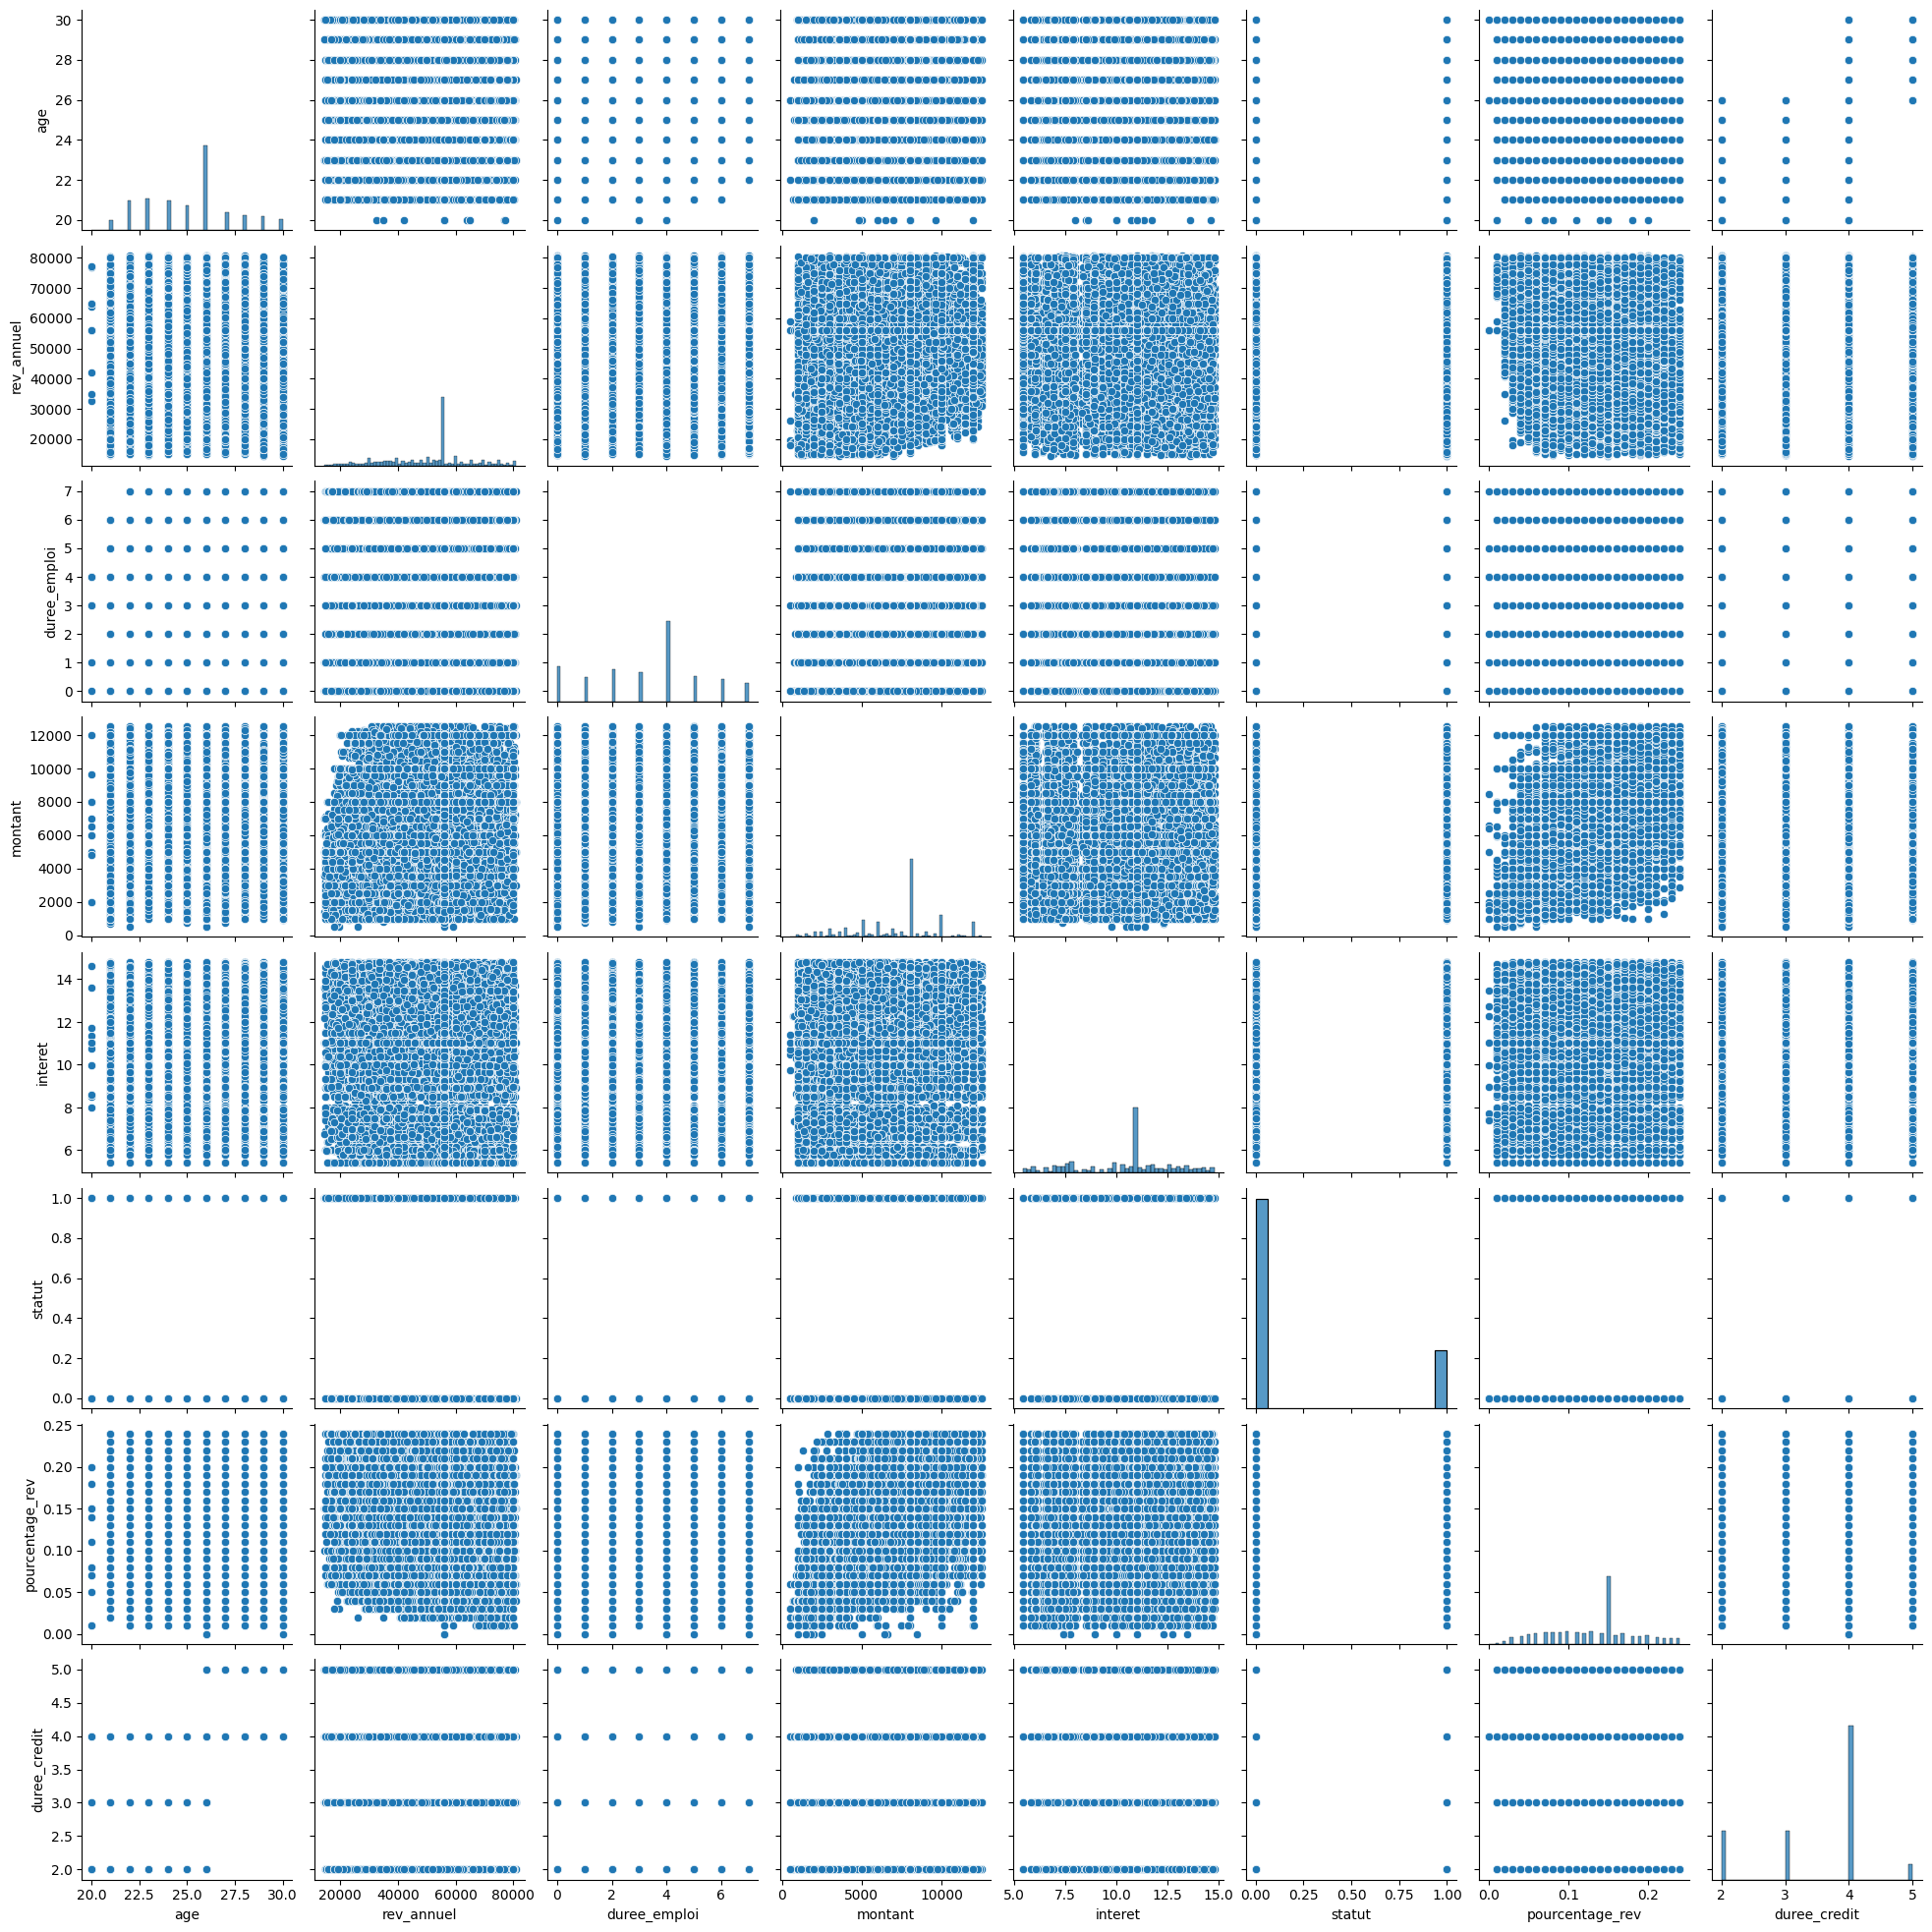

In [14]:
# Pairplot
sns.pairplot(data=card)
plt.show()

,age,rev_annuel,duree_emploi,montant,interet,statut,pourcentage_rev,duree_credit
age,1.000000,0.090694,-0.065634,0.045943,0.006582,-0.033381,-0.040228,0.569928
rev_annuel,0.090694,1.000000,0.125667,0.215839,-0.042357,-0.199547,-0.168684,0.041195
duree_emploi,-0.065634,0.125667,1.000000,0.059762,-0.055843,-0.086230,-0.018963,-0.044639
montant,0.045943,0.215839,0.059762,1.000000,0.012987,0.029218,0.519294,0.021685
interet,0.006582,-0.042357,-0.055843,0.012987,1.000000,0.164167,0.073234,0.009150
statut,-0.033381,-0.199547,-0.086230,0.029218,0.164167,1.000000,0.136892,-0.021903
pourcentage_rev,-0.040228,-0.168684,-0.018963,0.519294,0.073234,0.136892,1.000000,-0.020144
duree_credit,0.569928,0.041195,-0.044639,0.021685,0.009150,-0.021903,-0.020144,1.000000


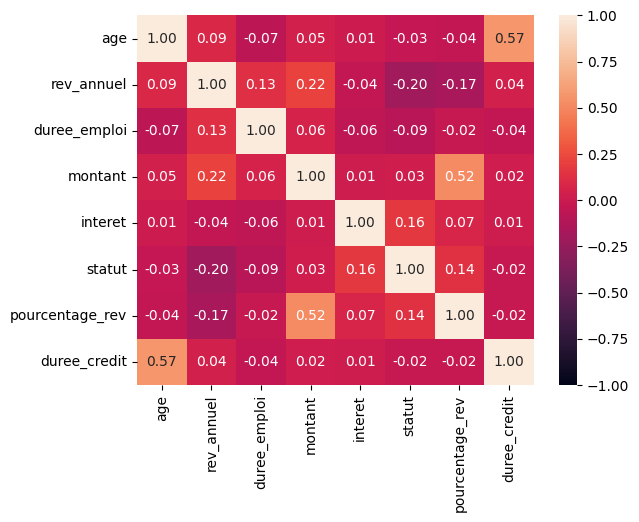

In [15]:
# Carte thermique
corr_coef = card.select_dtypes(include=["int64","float64"]).corr(method="spearman")
masque = np.triu(np.zeros_like(corr_coef, dtype=bool))
sns.heatmap(data = corr_coef, mask=masque, vmax = 1, vmin=-1, fmt= '.2f', annot=True)
corr_coef

In [16]:
# Tableau de contingence
for i in card.select_dtypes(include=["object"]).columns.to_list() + ["statut"]:
    for j in card.select_dtypes(include=["object"]).columns.to_list() + ["statut"]:
        if i != j:
            crosstab = pd.crosstab(card[i], card[j])
            statistic, pvalue, ddl, freq = stat.chi2_contingency(crosstab)
            if pvalue< 0.05:
                print(f"Les deux variables sont indépendantes avec pvalue {round(pvalue, 3)}")
            else:
                print(f"Les deux variables ne sont pas indépendantes  avec pvalue {round(pvalue ,3)}")
            print(crosstab)
            print("                                                      ")

Les deux variables sont indépendantes avec pvalue 0.0
intention  DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  PERSONAL  \
propriete                                                                     
MORTGAGE                2239       2559             1699     2132      2276   
OTHER                     17         17               12       17        18   
OWN                       68        489              300      405       414   
RENT                    2740       3225             1499     3343      2661   

intention  VENTURE  
propriete           
MORTGAGE      2188  
OTHER           26  
OWN            734  
RENT          2608  
                                                      
Les deux variables sont indépendantes avec pvalue 0.0
categorie_pret     A     B     C     D    E    F   G
propriete                                           
MORTGAGE        5256  3959  2221  1192  338   96  31
OTHER             26    34    17    20    8    2   0
OWN              832   7

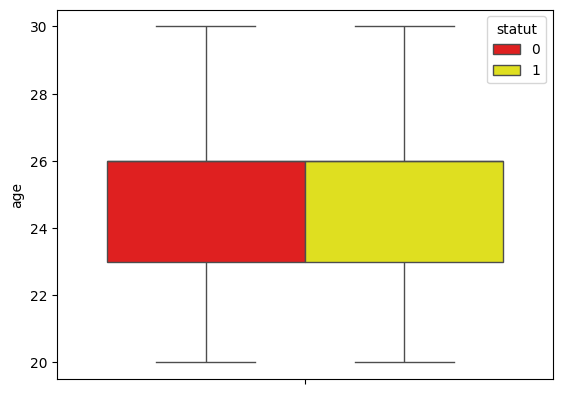

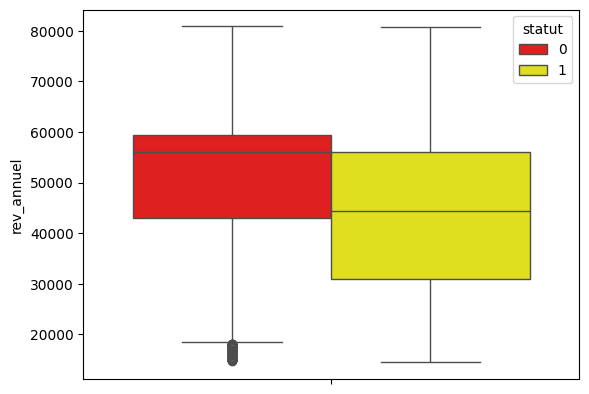

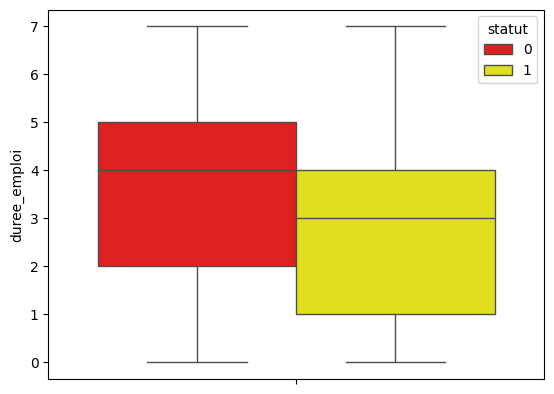

In [ ]:
for col in col_num:
    fig, ax = plt.subplots()
    sns.boxplot(data = card, hue = "statut", y = col, palette=['red','yellow'], legend=True)
    plt.show()

## **3. ANALYSE MULTI VARIEE AVEC LA METHODE PCA**

In [ ]:
# Encodage et normalisation
## Encodage
# Les variables categorielles
col_encoded = ["propriete","intention","categorie_pret","defaut_historique"]

card_encoded = pd.get_dummies(card[col_encoded], dtype=int)
card_norm = pd.concat([card,card_encoded], axis = 1)

for i in col_encoded:
    del card_norm[i]

## Normalisation
col_norm = ["age","rev_annuel","duree_emploi","montant","interet", "duree_credit"]
card_norm[col_norm] = (card_norm[col_norm] - card_norm[col_norm].mean())/card_norm[col_norm].std()
card_norm

,age,rev_annuel,duree_emploi,montant,interet,statut,pourcentage_rev,duree_credit,propriete_MORTGAGE,propriete_OTHER,...,intention_VENTURE,categorie_pret_A,categorie_pret_B,categorie_pret_C,categorie_pret_D,categorie_pret_E,categorie_pret_F,categorie_pret_G,defaut_historique_N,defaut_historique_Y
0,-1.417709,0.569319,0.334748,0.358106,0.260545,1,0.15,-0.596808,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.861550,0.364745,0.829169,-2.188829,0.315325,0,0.10,-1.766358,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.086188,0.364745,-1.148516,-0.551513,1.053960,1,0.15,-0.596808,1,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.973869,1.012562,0.334748,0.358106,0.260545,1,0.15,-1.766358,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.530028,0.255639,0.334748,0.358106,1.651700,1,0.15,0.572742,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.357653,0.160171,-1.148516,-0.442359,1.177778,0,0.11,0.572742,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,0.357653,0.364745,0.334748,0.358106,-1.243066,0,0.15,0.572742,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,0.357653,1.728571,-0.159673,0.358106,0.251282,1,0.15,0.572742,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,0.357653,0.364745,0.829169,0.358106,0.460491,0,0.10,0.572742,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Selection du set de train et de test
features = card_norm.drop(columns = ["statut"])
target = card_norm["statut"]

# Methode PCA
pca = PCA()

# Rediction de la dimensionnalité
features_pca = pca.fit_transform(features)
composants = pd.DataFrame(
    {
        "Dimension" : ["PC" + str(x+1) for x in range(26)],
        "Valeur propre":np.round(pca.explained_variance_, 3),
        "Taux de variance_expliquee" : np.round(pca.explained_variance_ratio_*100, 3),
        "Taux de variance_expliquee_cum": np.round(np.cumsum(pca.explained_variance_ratio_)*100)
    }
)
composants

,Dimension,Valeur propre,Taux de variance_expliquee,Taux de variance_expliquee_cum
0,PC1,1.563,18.551,19.0
1,PC2,1.397,16.577,35.0
2,PC3,1.222,14.508,50.0
3,PC4,0.931,11.048,61.0
4,PC5,0.760,9.018,70.0
5,PC6,0.480,5.695,75.0
6,PC7,0.391,4.637,80.0
7,PC8,0.369,4.382,84.0
8,PC9,0.191,2.269,87.0
9,PC10,0.181,2.153,89.0


C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_6956\1535426093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dim,y=variance_rate,
C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_6956\1535426093.py:7: UserWarning: 
The palette list has fewer values (1) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=dim,y=variance_rate,


Text(0, 0.5, 'Cumul de la variance expliquée')

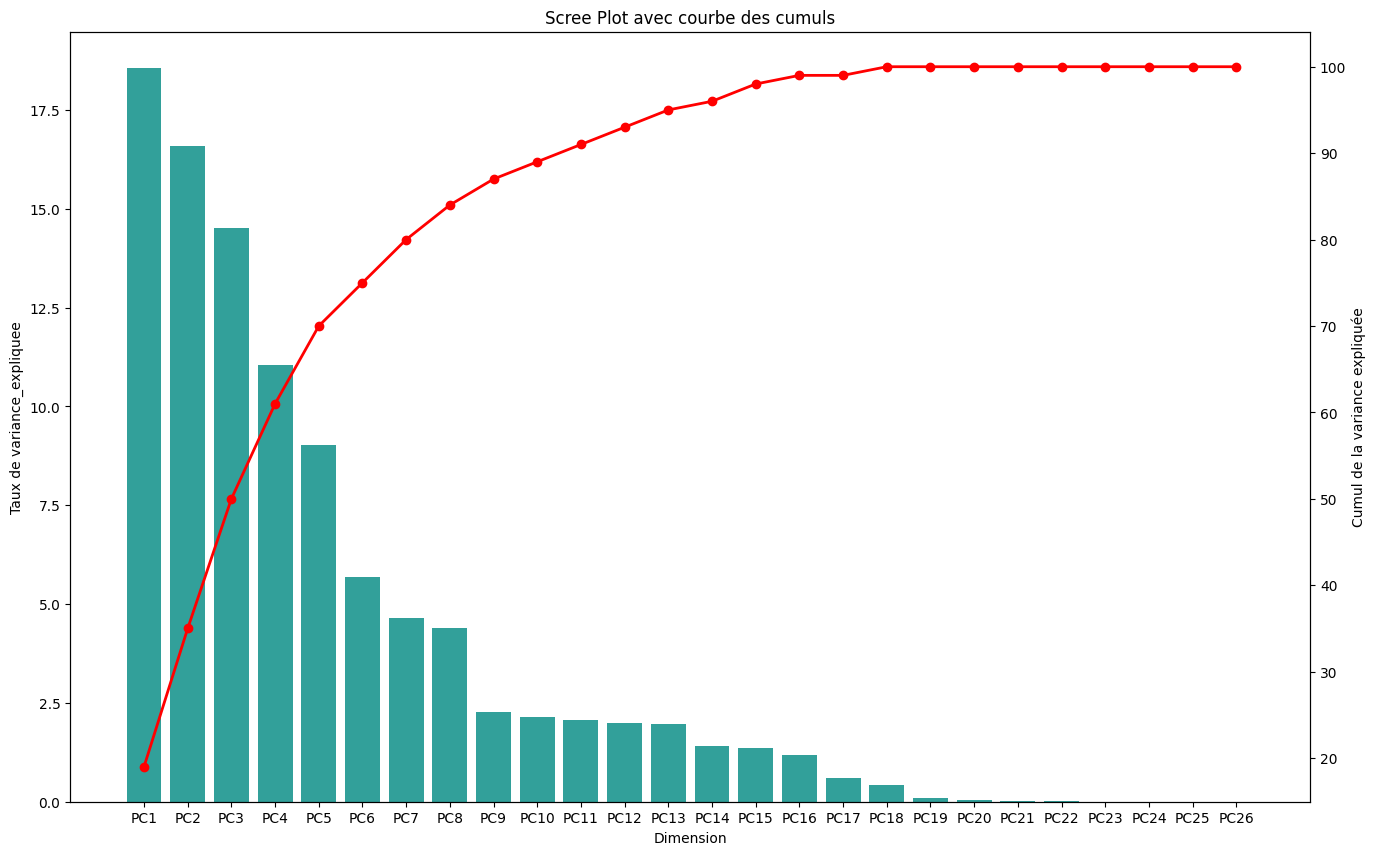

In [ ]:
# Scree plot
dim = composants.loc[:,"Dimension"]
variance_rate_cum = composants.loc[:,"Taux de variance_expliquee_cum"]
variance_rate = composants.loc[:,"Taux de variance_expliquee"]

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x=dim,y=variance_rate,
                palette = ["lightseagreen"])
ax.set_title('Scree Plot avec courbe des cumuls')
ax2 = ax.twinx() 
ax2.plot(dim, variance_rate_cum, color='red', marker='o', linestyle='-', linewidth=2) 
ax2.set_ylabel('Cumul de la variance expliquée')

In [ ]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(features.shape[1])])
df_cos_squared.index = features.columns

# print(df_cos_squared)


# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = features.shape[1]
feature_names=features.columns
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(np.round(variable_contributions, 5), columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib,PC5_contrib,PC6_contrib,PC7_contrib,PC8_contrib,PC9_contrib,PC10_contrib,...,PC17_contrib,PC18_contrib,PC19_contrib,PC20_contrib,PC21_contrib,PC22_contrib,PC23_contrib,PC24_contrib,PC25_contrib,PC26_contrib
age,0.71147,0.03194,0.01131,0.00506,0.00000,0.23607,0.00257,0.00022,0.00100,0.00002,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
rev_annuel,0.10968,0.29837,0.18041,0.00994,0.37719,0.00632,0.01523,0.00260,0.00005,0.00003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
duree_emploi,0.00054,0.25389,0.06239,0.59678,0.07677,0.00068,0.00735,0.00156,0.00001,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
montant,0.05911,0.14715,0.25249,0.26367,0.27724,0.00000,0.00028,0.00001,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
interet,0.00215,0.41946,0.53040,0.01869,0.00280,0.00000,0.00071,0.00570,0.00013,0.00008,...,0.00589,0.00012,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
pourcentage_rev,0.00000,0.00000,0.00015,0.00026,0.00074,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00173,0.0,0.0,0.0,0.0
duree_credit,0.66420,0.04810,0.02424,0.01968,0.01178,0.23113,0.00072,0.00007,0.00006,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
propriete_MORTGAGE,0.00611,0.03531,0.00118,0.00417,0.00654,0.00138,0.14218,0.02489,0.00002,0.00103,...,0.00000,0.00000,0.00000,0.00036,0.00000,0.00000,0.0,0.0,0.0,0.0
propriete_OTHER,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00335,0.00000,0.00000,0.0,0.0,0.0,0.0
propriete_OWN,0.00003,0.00006,0.00014,0.00007,0.00020,0.00000,0.00036,0.00006,0.00001,0.00133,...,0.00000,0.00000,0.00000,0.00040,0.00000,0.00000,0.0,0.0,0.0,0.0


##  **4.    MODELE LOGISTIQUE**

*ENTRAINEMENT ET PREDICTION*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=1)

# Répartition des classes avant rééchantillonnage
print("Avant SMOTE :", Counter(y_train))

# SMOTE et RandomUnderSampler avec vérification et réadaptation
smote = SMOTE(sampling_strategy=0.6, random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

X_resampled, y_resampled = smote.fit_resample(x_train, y_train)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)
X_final , y_final = under_sampler.fit_resample(X_resampled, y_resampled)
print("Après rééchantillonnage :", Counter(y_final))


Avant SMOTE : Counter({0: 9923, 1: 2751})
Après rééchantillonnage : Counter({0: 5953, 1: 5953})


In [ ]:


# Séparation des colonnes numériques et catégoriques
num_features = features.select_dtypes(include=[float]).columns.to_list()  
cat_features = features.select_dtypes(include=[object, 'category',int]).columns.to_list()

# Prétraitement : transformation des colonnes numériques et catégoriques
prepros = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),  # Gestion des inconnus
        ("num", StandardScaler(), num_features)
    ]
)


# Instanciation des modèles dans un pipeline
## Pipeline du modele logistique
pipe_logistic = Pipeline(steps=[
    ("preprocessing", prepros),  # Étape de prétraitement
    ("pca", PCA(n_components=4)),  # Réduction de dimensions
    ("over", SMOTE(sampling_strategy=0.6, random_state=1)),  # Sur-échantillonnage
    ("under", RandomUnderSampler(sampling_strategy=1.0, random_state=1)),  # Sous-échantillonnage
    ("model", LogisticRegression(solver='liblinear', random_state=1))  # Modèle final
])


(31686, 45)


,age,rev_annuel,duree_emploi,montant,interet,pourcentage_rev,duree_credit,propriete_MORTGAGE,propriete_OTHER,propriete_OWN,...,intention_VENTURE,categorie_pret_A,categorie_pret_B,categorie_pret_C,categorie_pret_D,categorie_pret_E,categorie_pret_F,categorie_pret_G,defaut_historique_N,defaut_historique_Y
0,-1.417709,0.569319,0.334748,0.358106,0.260545,0.15,-0.596808,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.861550,0.364745,0.829169,-2.188829,0.315325,0.10,-1.766358,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-0.086188,0.364745,-1.148516,-0.551513,1.053960,0.15,-0.596808,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.973869,1.012562,0.334748,0.358106,0.260545,0.15,-1.766358,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.530028,0.255639,0.334748,0.358106,1.651700,0.15,0.572742,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.357653,0.160171,-1.148516,-0.442359,1.177778,0.11,0.572742,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,0.357653,0.364745,0.334748,0.358106,-1.243066,0.15,0.572742,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,0.357653,1.728571,-0.159673,0.358106,0.251282,0.15,0.572742,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,0.357653,0.364745,0.829169,0.358106,0.460491,0.10,0.572742,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Entrainnement du modèle logistic
# Division du dataset en train et test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
pipe_logistic.fit(X=x_train,y=y_train) 


(25348, 45)

le choix du meuilleur pourcentage dans le rééchantillonage


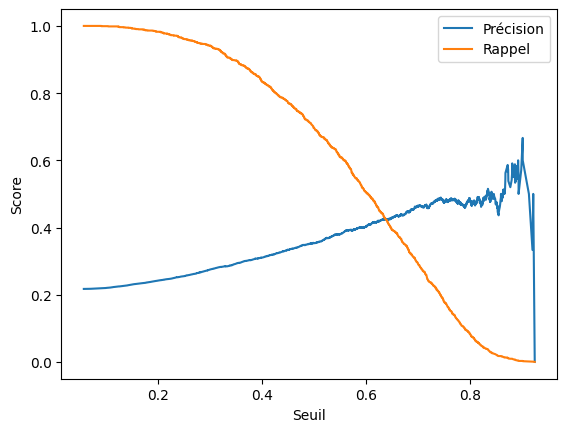

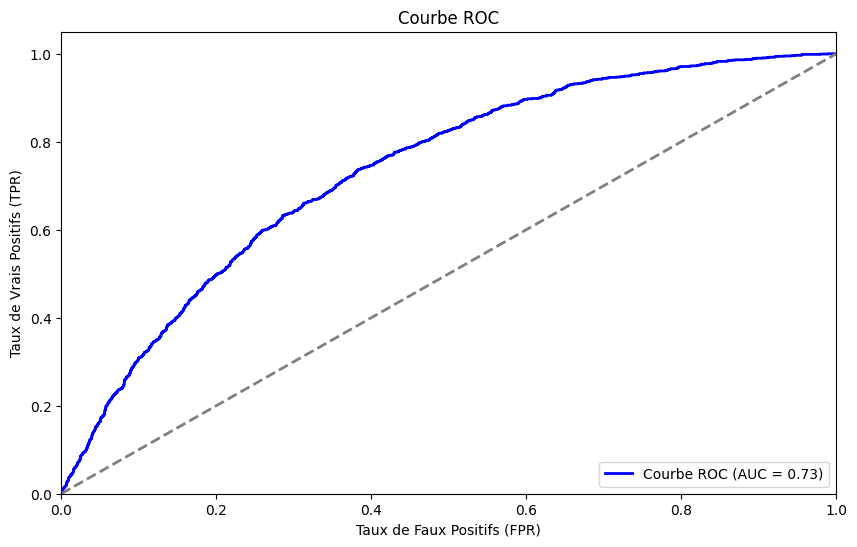

In [ ]:
from sklearn.metrics import precision_recall_curve

# Obtenir les probabilités prédictes
y_pred_proba = pipe_logistic.predict_proba(x_test)[:, 1]

# Calculer les courbes precision-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Visualiser la courbe pour choisir un seuil optimal
print("le choix du meuilleur pourcentage dans le rééchantillonage")
plt.plot(thresholds, precision[:-1], label='Précision')
plt.plot(thresholds, recall[:-1], label='Rappel')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.legend()
plt.show()



# Courbe ROC

# Calculer les métriques ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = roc_auc_score(y_test, y_pred_proba) 
# Tracer la courbe ROC 
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('Taux de Faux Positifs (FPR)') 
plt.ylabel('Taux de Vrais Positifs (TPR)') 
plt.title('Courbe ROC') 
plt.legend(loc="lower right") 
plt.show()

In [ ]:
# Prediction et test du modele logisti
y_pred1 = pipe_logistic.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      4961
           1       0.35      0.69      0.47      1377

    accuracy                           0.66      6338
   macro avg       0.62      0.67      0.61      6338
weighted avg       0.77      0.66      0.69      6338



In [ ]:
# Tableau croisé dans valeur reelle et predicte
print("Le tableau croissantes entre les valeurs reels et prediction (modele log)")
cross1 = pd.crosstab(y_test, y_pred1)
print(cross1)


Le tableau croissantes entre les valeurs reels et prediction (modele log)
col_0      0     1
statut            
0       3213  1748
1        420   957


##  **5.    MODELE D'ARBRE DE DECISION**
*ENTRAINEMENT ET PREDICTION*

In [ ]:
## Pipeline du modele d'arbre de décision
pipe_tree = Pipeline([
    ("preprocessing", prepros),
    ("pca", PCA(n_components=4)),
    ("over", SMOTE(sampling_strategy=0.6, random_state=1)),
    ("under", RandomUnderSampler(sampling_strategy=1, random_state=1)),
    ("tree", DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=2))
])

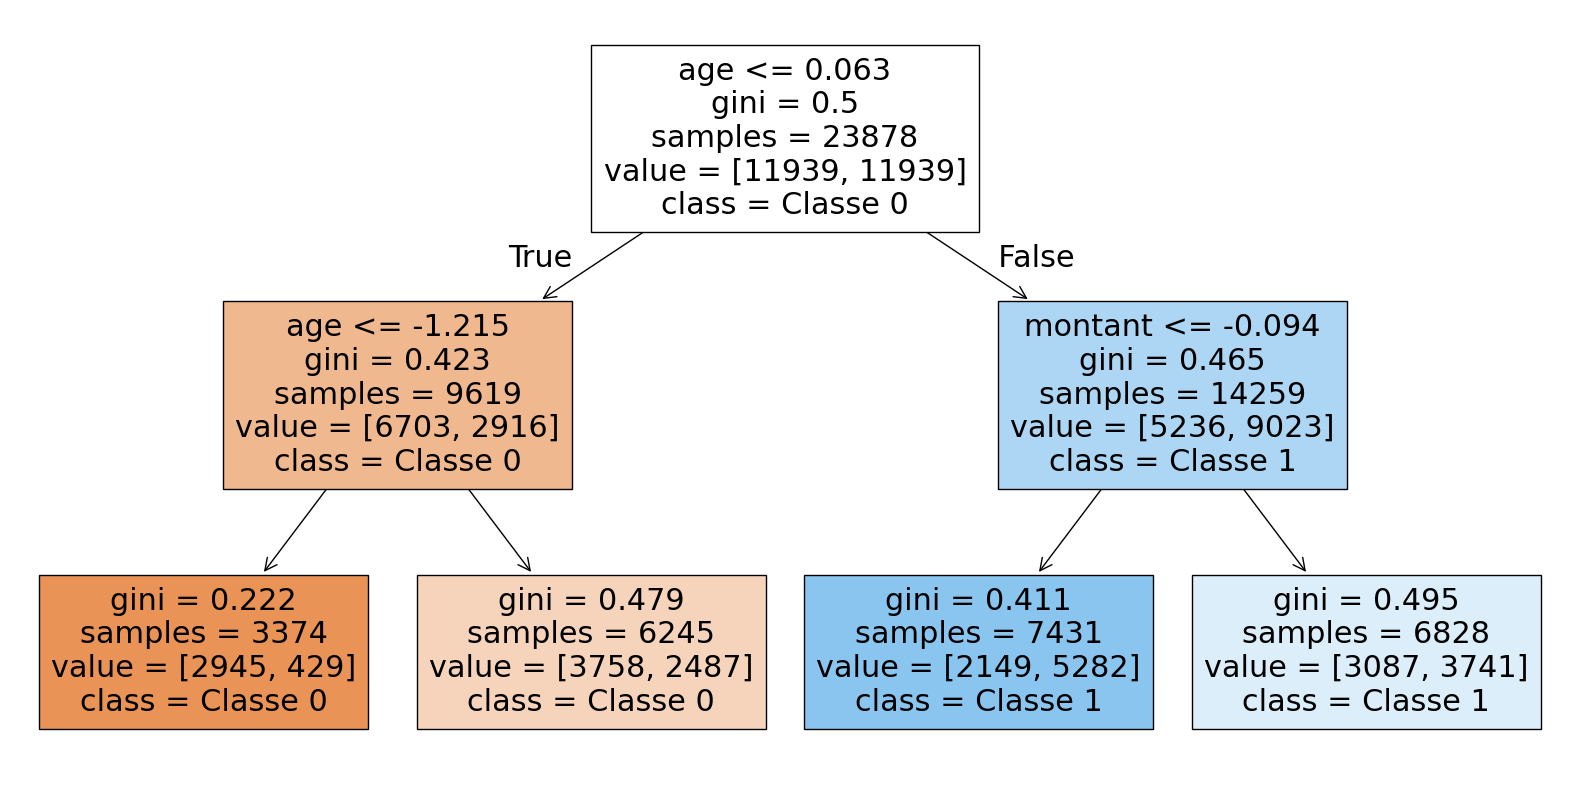

In [ ]:
# Entrainement du modele d'arbre de décision
pipe_tree.fit(X = x_train, y=y_train)
from sklearn import tree
# Ajuster le modèle 
pipe_tree.fit(x_train, y_train)
#Extraire le modèle d'arbre de décision ajusté 
tree_model = pipe_tree.named_steps["tree"]
# Tracer l'arbre de décision 
plt.figure(figsize=(20,10)) 
tree.plot_tree(tree_model, filled=True, feature_names=num_features + cat_features, class_names=["Classe 0", "Classe 1"]) 
plt.show()

In [ ]:
# Prediction et test du modele d'arbre de décision
y_pred2  = pipe_tree.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      4961
           1       0.33      0.77      0.46      1377

    accuracy                           0.61      6338
   macro avg       0.61      0.66      0.57      6338
weighted avg       0.77      0.61      0.64      6338

